<a id="1"></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraires And Utilities</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
pyo.init_notebook_mode()
from imblearn.over_sampling import SMOTE

In [2]:
#Format / Suppress Scientific Notation from Pandas Aggregation Results
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

<a id="1"></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Read Dataset</h1>

In [3]:
df = pd.read_csv('HPDD_06-13-2016 19-49-43-03_timeSeries.csv')
df.head(5)

Country Name  Country Code         Indicator Name Indicator Code  \
0  Papua New Guinea           853  Gross Government Debt         GGXWDG   
1          Paraguay           288  Gross Government Debt         GGXWDG   
2              Peru           293  Gross Government Debt         GGXWDG   
3       Philippines           566  Gross Government Debt         GGXWDG   
4            Poland           964  Gross Government Debt         GGXWDG   

  Attribute  1800  1801  1802  1803  1804  ...               2012  \
0     Value   NaN   NaN   NaN   NaN   NaN  ...      8,565,531,472   
1     Value   NaN   NaN   NaN   NaN   NaN  ... 17,602,970,667,209   
2     Value   NaN   NaN   NaN   NaN   NaN  ...    107,703,729,764   
3     Value   NaN   NaN   NaN   NaN   NaN  ...  4,288,804,000,000   
4     Value   NaN   NaN   NaN   NaN   NaN  ...    878,415,000,000   

                2013               2014               2015               2016  \
0     11,765,760,357     14,827,301,684     15,808,907,375     16,167,806,460   
1 20,962,517,921,124 26,335,863,815,556 32,983,671,464,431 38,283,609,104,963   
2    111,017,000,000    119,303,000,000    135,075,840,432    155,064,336,096   
3  4,529,800,000,000  4,602,500,000,000  4,853,521,775,314  5,038,157,525,184   
4    926,116,000,000    866,502,000,000    914,411,733,479    960,094,518,842   

                2017               2018               2019               2020  \
0     16,706,474,234     16,670,336,431     16,332,752,618     15,529,173,474   
1 43,433,234,510,990 49,026,070,143,903 54,626,959,046,258 60,512,160,214,977   
2    168,318,380,631    178,352,836,680    186,398,450,606    199,599,350,960   
3  5,246,268,307,250  5,472,504,737,125  5,722,526,868,731  5,997,654,657,391   
4  1,011,376,310,051  1,059,548,644,821  1,101,686,670,284  1,146,170,457,607   

   Unnamed: 226  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 227 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 227 entries, Country Name to Unnamed: 226
dtypes: float64(222), int64(1), object(4)
memory usage: 1011.0+ KB


In [5]:
df.describe().T

count                mean                   std  min  25%  \
Country Code    570                 548                   265  111  309   
1800              7          99,174,754           164,861,433   18  106   
1801              7         110,169,280           190,008,307   16  106   
1802              7         105,457,674           176,172,418   16  111   
1803              7         103,421,005           175,548,026   16  112   
...             ...                 ...                   ...  ...  ...   
2017            562 100,897,203,997,721   970,362,703,358,748    0   74   
2018            562 111,278,924,825,843 1,074,187,717,810,394    0   72   
2019            560 122,700,593,523,447 1,182,449,485,694,670    2   70   
2020            560 135,297,196,774,278 1,297,105,199,705,479    2   71   
Unnamed: 226      0                 NaN                   NaN  NaN  NaN   

                        50%               75%                    max  
Country Code            566               734                    968  
1800             38,901,000        98,161,024            459,000,000  
1801             40,867,000       101,158,866            528,000,000  
1802             42,349,000       102,927,241            490,000,000  
1803             40,248,000        97,849,398            488,000,000  
...                     ...               ...                    ...  
2017         41,429,900,098 2,119,252,136,993 16,072,028,906,472,000  
2018         44,480,738,472 2,200,086,375,482 17,846,664,035,096,600  
2019         48,017,736,846 2,320,016,066,470 19,538,674,792,487,000  
2020         49,460,398,028 2,423,615,977,381 21,333,564,138,119,800  
Unnamed: 226            NaN               NaN                    NaN  

[223 rows x 8 columns]

<a id="1"></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Preprocessing</h1>


In [6]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Attribute', '1800', '1801', '1802', '1803', '1804',
       ...
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'Unnamed: 226'],
      dtype='object', length=227)

In [7]:
#Checking the potential columns before removing them. They are not needed in our analysis
print(df['Attribute'].unique())
print(df['Unnamed: 226'].unique())
print(df['Indicator Code'].unique())
print(df['Country Code']) #not needed)

['Value']
[nan]
['GGXWDG' 'NGDP' 'GGXWDG_GDP']
0      853
1      288
2      293
3      566
4      964
      ... 
565    512
566    868
567    868
568    868
569    948
Name: Country Code, Length: 570, dtype: int64


In [8]:
#Removing columns that are not needed.
df=df.drop(['Attribute','Unnamed: 226','Indicator Code','Country Code'], axis=1)

In [9]:
df.columns

Index(['Country Name', 'Indicator Name', '1800', '1801', '1802', '1803',
       '1804', '1805', '1806', '1807',
       ...
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object', length=223)

In [10]:
#Three countries have at least one indicator with values for the entire period
df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

Country Name          Indicator Name        1800        1801  \
111   United States  Gross Domestic Product 459,000,000 528,000,000   
169          Sweden  Gross Domestic Product 113,322,048 119,317,733   
380  United Kingdom       Debt to GDP Ratio         177         177   

           1802        1803        1804        1805        1806        1807  \
111 490,000,000 488,000,000 534,000,000 592,000,000 609,000,000 564,000,000   
169 125,154,482 118,598,796 110,355,071 122,618,094 134,696,929 140,261,991   
380         189         191         188         189         193         194   

     ...               2011               2012               2013  \
111  ... 15,517,925,000,000 16,155,250,000,000 16,663,150,000,000   
169  ...  3,656,577,000,000  3,684,800,000,000  3,775,016,000,000   
380  ...                 82                 86                 87   

                  2014               2015               2016  \
111 17,348,075,000,000 17,968,194,954,493 18,697,922,012,946   
169  3,914,704,000,000  4,091,866,602,872  4,272,525,676,425   
380                 89                 89                 88   

                  2017               2018               2019  \
111 19,555,874,132,246 20,493,248,358,783 21,404,193,267,590   
169  4,459,187,839,972  4,661,333,369,638  4,861,948,889,805   
380                 87                 85                 81   

                  2020  
111 22,294,105,366,682  
169  5,065,380,154,774  
380                 78  

[3 rows x 223 columns]

In [11]:
#how many countries have 'Debt to'
options = ['Gross Domestic Product', 'Debt Government Debt']
df[(df['Indicator Name'] != 'Debt to GDP Ratio') &
          df['Indicator Name'].isin(options)][['Country Name']]

Country Name
18                 South Africa
19                  South Sudan
20                        Spain
21                    Sri Lanka
22          St. Kitts and Nevis
..                          ...
541                      Jordan
542                  Kazakhstan
543                       Kenya
565                 Afghanistan
566  Micronesia, Fed. States of

[193 rows x 1 columns]

#### Adding a new column "Continent"

In [12]:
df["Country Name"].nunique()

193

In [82]:
!pip install pycountry-convert


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Adding new column Continent automatically for the countries that can be recongize by the pycountry_convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

In [14]:
#Apply the function into the df
df['Continent'] = df['Country Name'].apply(get_continent)

In [15]:
df['Continent'].unique()

array(['OC', 'SA', 'AS', 'EU', 'AF', 'NA', 'Unknown'], dtype=object)

In [16]:
#listing all countries which continent was not found and are under "Unknown"
df.loc[df.Continent.str.contains('Unknown', case=False), 'Country Name'].unique()

array(['St. Vincent and the Grenadines', 'Bahamas, The', 'FYR Macedonia ',
       'Gambia, The', 'Eastern Caribbean Currency Union', 'Korea',
       'Kosovo', 'Lao P.D.R.', 'Hong Kong SAR', 'Montenegro, Rep. of',
       'Euro area', 'Timor-Leste, Dem. Rep. of',
       'Taiwan Province of China', 'Micronesia, Fed. States of'],
      dtype=object)

In [17]:
# Replacing the old name (probably not recongizable for the code) and try again
df['Country Name'] = df['Country Name'].replace(['Bahamas, The', 'FYR Macedonia ', 'Gambia, The', 'Korea','Montenegro, Rep. of', 'Taiwan Province of China','Timor-Leste, Dem. Rep. of','Kosovo'], 
                                          ['Bahamas', 'North Macedonia', 'Gambia', 'South Korea', 'Montenegro', 'Taiwan','Timor Leste','Republic of Kosovo'])

In [18]:
df['Continent'] = df['Country Name'].apply(get_continent)

In [19]:
#listing all countries which continent was not found
df.loc[df.Continent.str.contains('Unknown', case=False), 'Country Name'].unique()

array(['St. Vincent and the Grenadines',
       'Eastern Caribbean Currency Union', 'Republic of Kosovo',
       'Lao P.D.R.', 'Hong Kong SAR', 'Euro area', 'Timor Leste',
       'Micronesia, Fed. States of'], dtype=object)

In [20]:
# #manually changing the continent Kosovo belongs to, as none of the option name is not recongized by the code. Kosovo will be removed as many data is missing.
# df.loc[df['Country Name'] == 'Republic of Kosovo', 'Continent'] = "Europe"

In [21]:
#removing all the rest countries, which do not exist more
df = df[df['Continent'] != 'Unknown']

In [22]:
df['Continent'].unique()

array(['OC', 'SA', 'AS', 'EU', 'AF', 'NA'], dtype=object)

In [23]:
# cross-check if there is any "Unknown" left
df.apply(lambda row: row.astype(str).str.contains('Unknown').sum(), axis=0)

Country Name      0
Indicator Name    0
1800              0
1801              0
1802              0
                 ..
2017              0
2018              0
2019              0
2020              0
Continent         0
Length: 224, dtype: int64

In [24]:
# Renaming short abb to full continent name
df['Continent'] = df['Continent'].replace(['OC', 'SA', 'AS', 'EU', 'AF', 'NA'], 
                                          ['Oceania', 'South America', 'Asia', 'Europe', 'Africa', 'North America'])

In [25]:
df['Continent'].unique()

array(['Oceania', 'South America', 'Asia', 'Europe', 'Africa',
       'North America'], dtype=object)

In [26]:
#Total countries left
df["Country Name"].nunique()

185

In [27]:
#showing by Continent how many indicators are available by country
country_count = df.pivot_table(index = "Continent", 
                            values = "Country Name", 
                            columns='Indicator Name', 
                            aggfunc = lambda x : x.nunique(), 
                            margins = True,
                            fill_value=0)

In [28]:
country_count

Indicator Name  Debt to GDP Ratio  Gross Domestic Product  \
Continent                                                   
Africa                         53                      53   
Asia                           44                      45   
Europe                         40                      40   
North America                  22                      23   
Oceania                        11                      12   
South America                  12                      12   
All                           182                     185   

Indicator Name  Gross Government Debt  All  
Continent                                   
Africa                             53   53  
Asia                               43   45  
Europe                             40   40  
North America                      22   23  
Oceania                            11   12  
South America                      12   12  
All                               181  185

#### Adding a new column "EU_countries"

In [99]:
#Getting EU countries
!pip install countrygroups


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from countrygroups import EUROPEAN_UNION

print(EUROPEAN_UNION.names)

['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']


In [30]:
EU_countries = EUROPEAN_UNION.names

In [31]:
#mapping all EU countries
cond=[df['Country Name'].isin(EU_countries)]
values=['yes']
df['EU_country']=np.select(cond,values)
df['EU_country'] = df['EU_country'].replace(['0'], ['no'])
df.head(5)

Country Name         Indicator Name  1800  1801  1802  1803  1804  \
0  Papua New Guinea  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   
1          Paraguay  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   
2              Peru  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   
3       Philippines  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   
4            Poland  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   

   1805  1806  1807  ...               2013               2014  \
0   NaN   NaN   NaN  ...     11,765,760,357     14,827,301,684   
1   NaN   NaN   NaN  ... 20,962,517,921,124 26,335,863,815,556   
2   NaN   NaN   NaN  ...    111,017,000,000    119,303,000,000   
3   NaN   NaN   NaN  ...  4,529,800,000,000  4,602,500,000,000   
4   NaN   NaN   NaN  ...    926,116,000,000    866,502,000,000   

                2015               2016               2017               2018  \
0     15,808,907,375     16,167,806,460     16,706,474,234     16,670,336,431   
1 32,983,671,464,431 38,283,609,104,963 43,433,234,510,990 49,026,070,143,903   
2    135,075,840,432    155,064,336,096    168,318,380,631    178,352,836,680   
3  4,853,521,775,314  5,038,157,525,184  5,246,268,307,250  5,472,504,737,125   
4    914,411,733,479    960,094,518,842  1,011,376,310,051  1,059,548,644,821   

                2019               2020      Continent  EU_country  
0     16,332,752,618     15,529,173,474        Oceania          no  
1 54,626,959,046,258 60,512,160,214,977  South America          no  
2    186,398,450,606    199,599,350,960  South America          no  
3  5,722,526,868,731  5,997,654,657,391           Asia          no  
4  1,101,686,670,284  1,146,170,457,607         Europe         yes  

[5 rows x 225 columns]

In [32]:
df.loc[(df['EU_country'] =='yes'),['Country Name','Continent','EU_country']]

Country Name Continent EU_country
4         Poland    Europe        yes
5       Portugal    Europe        yes
7        Romania    Europe        yes
20         Spain    Europe        yes
30       Belgium    Europe        yes
..           ...       ...        ...
500      Germany    Europe        yes
509     Bulgaria    Europe        yes
526      Austria    Europe        yes
532      Denmark    Europe        yes
561      Denmark    Europe        yes

[75 rows x 3 columns]

In [33]:
#Checking the available indicators per country
agg_ind = df.groupby('Country Name').agg({'Indicator Name':pd.Series.nunique})

In [34]:
df.Continent[df['Indicator Name'] == 'Debt to GDP Ratio'].count()

182

In [35]:
agg_ind.head(5)

Indicator Name
Country Name                
Afghanistan                1
Albania                    3
Algeria                    3
Angola                     3
Anguilla                   3

In [36]:
#Countries with 1 indicator
one_ind = agg_ind[(agg_ind["Indicator Name"]==1)]
display(one_ind)

Indicator Name
Country Name                
Afghanistan                1
Montserrat                 1
Palau                      1

In [37]:
two_ind = agg_ind.loc[agg_ind['Indicator Name'] == 2]
display(two_ind)

Indicator Name
Country Name                
Mongolia                   2

In [38]:
#they have to be deleted
#i = df[((df.Country Name  == 'Afghanistan') & (df.Country Name == 'Montserrat'))].index
df = df[df['Country Name'] != 'Afghanistan']
df = df[df['Country Name'] != 'Montserrat']
df = df[df['Country Name'] != 'Palau']

In [39]:
df["Country Name"].nunique()

182

In [40]:
# Countries with two indicators
agg_ind.loc[agg_ind['Indicator Name'] == 2]

Indicator Name
Country Name                
Mongolia                   2

In [41]:
agg_ind[(agg_ind["Indicator Name"]==3)].count()

Indicator Name    181
dtype: int64

In [42]:
df[(df["Country Name"] == 'Mongolia')]

Country Name          Indicator Name  1800  1801  1802  1803  1804  1805  \
192     Mongolia  Gross Domestic Product   NaN   NaN   NaN   NaN   NaN   NaN   
569     Mongolia       Debt to GDP Ratio   NaN   NaN   NaN   NaN   NaN   NaN   

     1806  1807  ...               2013               2014               2015  \
192   NaN   NaN  ... 19,174,242,598,302 21,937,159,393,335 24,265,210,269,811   
569   NaN   NaN  ...                NaN                NaN                NaN   

                  2016               2017               2018  \
192 26,849,189,963,700 29,738,165,425,394 33,611,390,233,686   
569                NaN                NaN                NaN   

                  2019               2020  Continent  EU_country  
192 38,026,060,828,892 44,131,637,495,581       Asia          no  
569                NaN                NaN       Asia          no  

[2 rows x 225 columns]

In [43]:
# Because the second indicator for Mongolia ("Debt to GDP ratio") has almost all nan values, this country has to be removed as well
df = df[df['Country Name'] != 'Mongolia']
df["Country Name"].nunique()

181

#### Adding a list of all countries, continents and all indicators

In [44]:
countries = list(df["Country Name"].unique())
continents = list(df["Continent"].unique())
indicators = list(df["Indicator Name"].unique())

In [45]:
# years = df.columns[3:-1]
# years

In [46]:
# Number of countries per continent
df.groupby("Continent")["Country Name"].nunique()

Continent
Africa           53
Asia             43
Europe           40
North America    22
Oceania          11
South America    12
Name: Country Name, dtype: int64

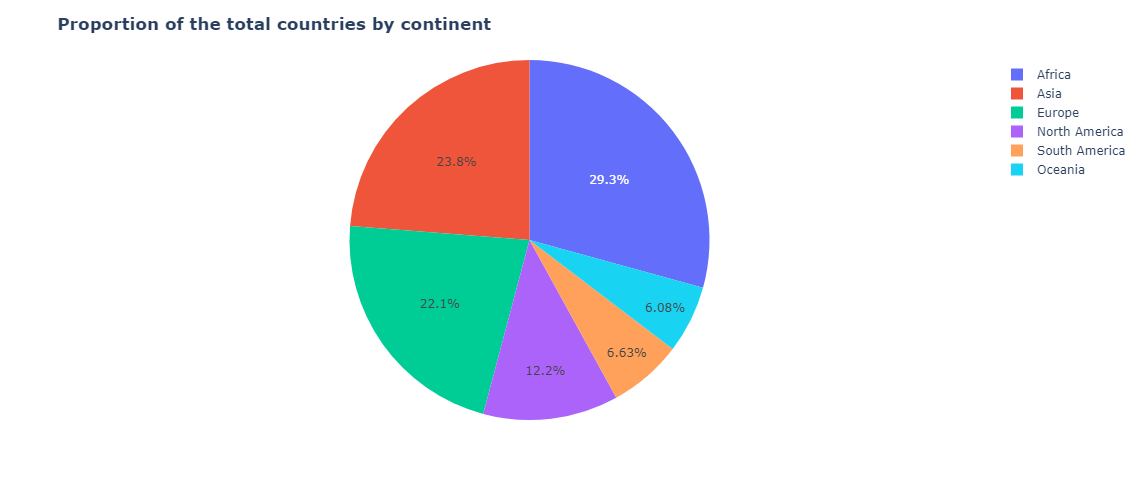

In [47]:
fig = ex.pie(continents, names=df["Continent"], width=500, height=500) #brojce da se stavi, ne procent
fig.update_layout(title='<b>Proportion of the total countries by continent<b>')
fig.show()

In [48]:
# #adding a new sum column for all years, by country#najverojatno ke treba da se izbrise
# df['Value'] = df.sum(axis=1, numeric_only= True)

#### Transposing the dataframe 

In [49]:
# Transform the dataset (convert years from rows into column)
id_vars=['Country Name', 'Indicator Name','Continent', 'EU_country']
df2 = pd.melt(frame=df, id_vars=id_vars, var_name='year', value_name='Value')
df2['year'] = df2['year'].astype(int) # convert from object to float or int
df2.head(6)

Country Name         Indicator Name      Continent EU_country  year  \
0  Papua New Guinea  Gross Government Debt        Oceania         no  1800   
1          Paraguay  Gross Government Debt  South America         no  1800   
2              Peru  Gross Government Debt  South America         no  1800   
3       Philippines  Gross Government Debt           Asia         no  1800   
4            Poland  Gross Government Debt         Europe        yes  1800   
5          Portugal  Gross Government Debt         Europe        yes  1800   

   Value  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN

In [243]:
#showing by Continent how many indicators are available by country
country_count2 = df2.pivot_table(index = "Country Name", 
                            values = "Value",
                            columns="year",     
                            aggfunc = lambda x : x.isnull().count(),
                            margins = True,
                            fill_value=0)

In [244]:
country_count2 #ne gi broi nan na nikoj nacin

year                 1800  1801  1802  1803  1804  1805  1806  1807  1808  \
Country Name                                                                
Albania                 3     3     3     3     3     3     3     3     3   
Algeria                 3     3     3     3     3     3     3     3     3   
Angola                  3     3     3     3     3     3     3     3     3   
Anguilla                3     3     3     3     3     3     3     3     3   
Antigua and Barbuda     3     3     3     3     3     3     3     3     3   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Vietnam                 3     3     3     3     3     3     3     3     3   
Yemen                   3     3     3     3     3     3     3     3     3   
Zambia                  3     3     3     3     3     3     3     3     3   
Zimbabwe                3     3     3     3     3     3     3     3     3   
All                     7     7     7     7     7     7     7     7     7   

year                 1809  ...  2012  2013  2014  2015  2016  2017  2018  \
Country Name               ...                                             
Albania                 3  ...     3     3     3     3     3     3     3   
Algeria                 3  ...     3     3     3     3     3     3     3   
Angola                  3  ...     3     3     3     3     3     3     3   
Anguilla                3  ...     3     3     3     3     3     3     3   
Antigua and Barbuda     3  ...     3     3     3     3     3     3     3   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
Vietnam                 3  ...     3     3     3     3     3     3     3   
Yemen                   3  ...     3     3     3     3     3     3     3   
Zambia                  3  ...     3     3     3     3     3     3     3   
Zimbabwe                3  ...     3     3     3     3     3     3     3   
All                     7  ...   539   539   539   539   536   536   536   

year                 2019  2020    All  
Country Name                            
Albania                 3     3    122  
Algeria                 3     3    140  
Angola                  3     3     99  
Anguilla                3     3     73  
Antigua and Barbuda     3     3    120  
...                   ...   ...    ...  
Vietnam                 3     3    115  
Yemen                   3     3     82  
Zambia                  3     3    131  
Zimbabwe                3     3    187  
All                   536   536  31701  

[182 rows x 222 columns]

In [234]:
# def replace_nan(x):
#     if type(x)!=str:
#         return  'nan' if np.isnan(x) else x
#     else:
#         return x

# df2.applymap(replace_nan)

Country Name         Indicator Name  \
0                       Papua New Guinea  Gross Government Debt   
1                               Paraguay  Gross Government Debt   
2                                   Peru  Gross Government Debt   
3                            Philippines  Gross Government Debt   
4                                 Poland  Gross Government Debt   
...                                  ...                    ...   
119998  Democratic Republic of the Congo  Gross Government Debt   
119999                           Denmark  Gross Government Debt   
120000                          Djibouti  Gross Government Debt   
120001                          Dominica  Gross Government Debt   
120002                Dominican Republic  Gross Government Debt   

            Continent EU_country  year              Value  
0             Oceania         no  1800                nan  
1       South America         no  1800                nan  
2       South America         no  1800                nan  
3                Asia         no  1800                nan  
4              Europe        yes  1800                nan  
...               ...        ...   ...                ...  
119998         Africa         no  2020 15,013,512,696,294  
119999         Europe        yes  2020  1,130,020,303,008  
120000         Africa         no  2020    245,448,137,249  
120001  North America         no  2020      1,539,663,660  
120002  North America         no  2020  1,723,106,556,468  

[120003 rows x 6 columns]

In [70]:
pd.pivot_table(df2, values = 'Value', index=['Country Name','year'], columns = 'Indicator Name').reset_index()

Indicator Name Country Name  year  Debt to GDP Ratio  Gross Domestic Product  \
0                   Albania  1950                NaN           8,847,054,054   
1                   Albania  1951                NaN           9,085,924,210   
2                   Albania  1952                NaN           9,331,243,659   
3                   Albania  1953                NaN           9,583,186,886   
4                   Albania  1954                NaN           9,841,932,600   
...                     ...   ...                ...                     ...   
13326              Zimbabwe  2016                 57          14,291,941,099   
13327              Zimbabwe  2017                 58          14,993,966,768   
13328              Zimbabwe  2018                 59          15,735,888,645   
13329              Zimbabwe  2019                 60          16,608,797,831   
13330              Zimbabwe  2020                 55          17,528,951,757   

Indicator Name  Gross Government Debt  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  
...                               ...  
13326                   8,213,449,011  
13327                   8,745,596,718  
13328                   9,346,885,059  
13329                   9,889,268,309  
13330                   9,634,856,636  

[13331 rows x 5 columns]

<a id="1"></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>

<a id="1"></a>

<h1 style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Handling Missing Data</h1>


In [54]:
!pip install geopandas 


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
import geopandas as gpd
import shapely.wkt

In [111]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

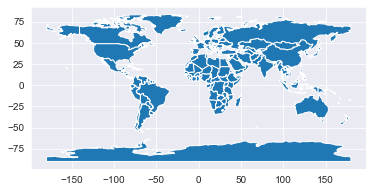

In [112]:
gdf.plot()

In [113]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

<AxesSubplot:>

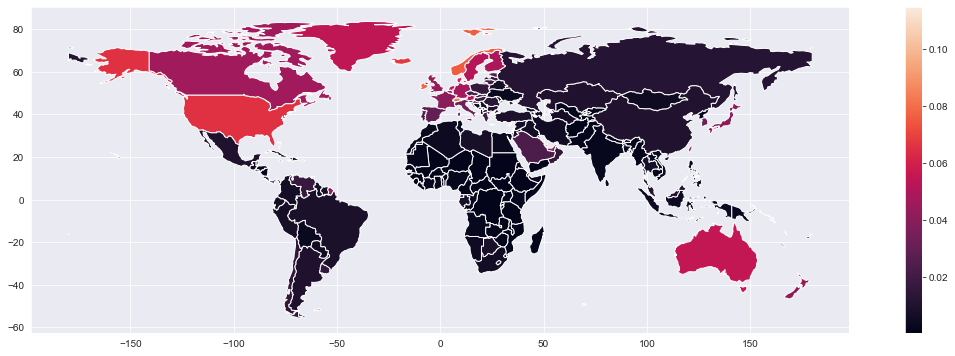

In [114]:
fig, ax = plt.subplots(figsize=(20,6)) 
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap', legend=True, ax=ax)

In [123]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889,953        Oceania                      Fiji    FJI        5496   
1    58,005,463         Africa                  Tanzania    TZA       63177   
2       603,253         Africa                 W. Sahara    ESH         907   
3    37,589,262  North America                    Canada    CAN     1736425   
4   328,239,523  North America  United States of America    USA    21433226   
..          ...            ...                       ...    ...         ...   
172   6,944,975         Europe                    Serbia    SRB       51475   
173     622,137         Europe                Montenegro    MNE        5542   
174   1,794,248         Europe                    Kosovo    -99        7926   
175   1,394,973  North America       Trinidad and Tobago    TTO       24269   
176  11,062,113         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [ ]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Continent))

In [215]:
country_count2

Continent            Africa  Asia  Europe  North America  Oceania  \
Country Name                                                        
Albania                   0     0     663              0        0   
Algeria                 663     0       0              0        0   
Angola                  663     0       0              0        0   
Anguilla                  0     0       0            663        0   
Antigua and Barbuda       0     0       0            663        0   
...                     ...   ...     ...            ...      ...   
Vietnam                   0   663       0              0        0   
Yemen                     0   663       0              0        0   
Zambia                  663     0       0              0        0   
Zimbabwe                663     0       0              0        0   
All                    7178  6026    9256           4683     1876   

Continent            South America    All  
Country Name                               
Albania                          0    122  
Algeria                          0    140  
Angola                           0     99  
Anguilla                         0     73  
Antigua and Barbuda              0    120  
...                            ...    ...  
Vietnam                          0    115  
Yemen                            0     82  
Zambia                           0    131  
Zimbabwe                         0    187  
All                           2682  31701  

[182 rows x 7 columns]

In [131]:
#Total missing data
(len(df[df.isna().any(axis=1)]) / len(df))*100 

99.4475138121547

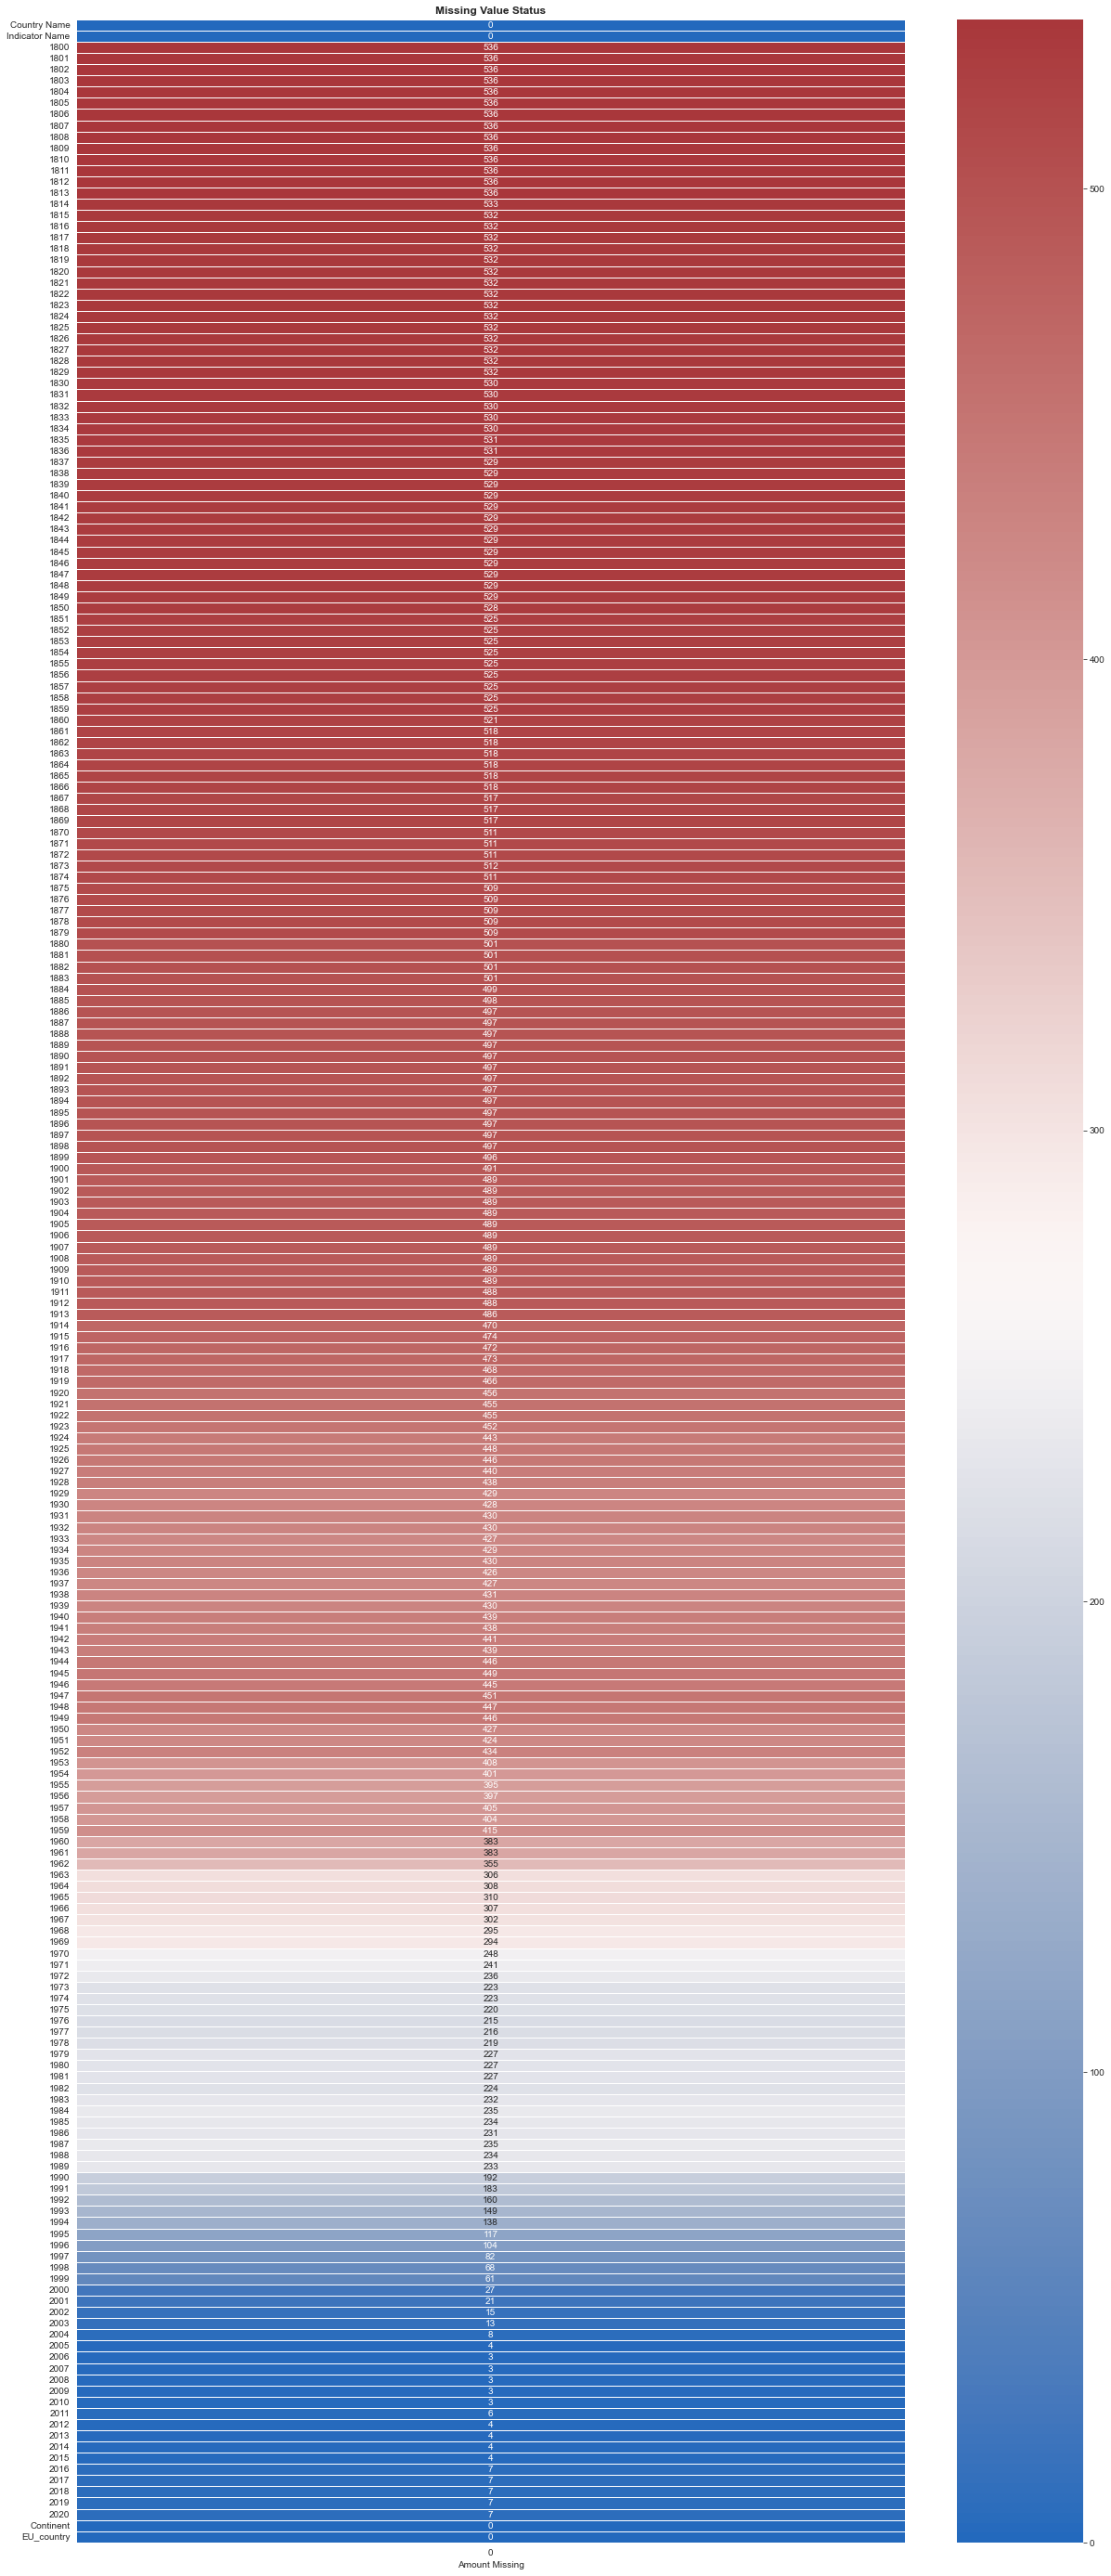

In [132]:
fig, ax = plt.subplots(figsize=(20,50)) # da se stavi samo GDP

plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag', linewidths=.5, ax=ax)
ax.set_xlabel('Amount Missing')
plt.show()

In [133]:
# Defining dataframe for each continent and EU
Europe_df = df[df['Continent'] == 'Europe'].iloc[:,:]
Asia_df = df[df['Continent'] == 'Asia'].iloc[:,:]
Africa_df = df[df['Continent'] == 'Africa'].iloc[:,:]
North_America_df = df[df['Continent'] == 'North America'].iloc[:,:]
South_America_df = df[df['Continent'] == 'South America'].iloc[:,:]
Oceania_df = df[df['Continent'] == 'Oceania'].iloc[:,:]
EU_df = df[df['EU_country'] == 'yes'].iloc[:,:]

In [134]:
#Missing data by each continent
print('Missing data in Europe:',(len(Europe_df[Europe_df.isna().any(axis=1)]) / len(Europe_df))*100) 
print('Missing data in Asia:',(len(Asia_df[Asia_df.isna().any(axis=1)]) / len(Asia_df))*100) 
print('Missing data in Africa:',(len(Africa_df[Africa_df.isna().any(axis=1)]) / len(Africa_df))*100) 
print('Missing data in North America:',(len(North_America_df[North_America_df.isna().any(axis=1)]) / len(North_America_df))*100) 
print('Missing data in South America:',(len(South_America_df[South_America_df.isna().any(axis=1)]) / len(South_America_df))*100) 
print('Missing data in Oceania:',(len(Oceania_df[Oceania_df.isna().any(axis=1)]) / len(Oceania_df))*100) 
print('Missing data in EU:',(len(EU_df[EU_df.isna().any(axis=1)]) / len(EU_df))*100) 

Missing data in Europe: 98.33333333333333
Missing data in Asia: 100.0
Missing data in Africa: 100.0
Missing data in North America: 98.48484848484848
Missing data in South America: 100.0
Missing data in Oceania: 100.0
Missing data in EU: 98.66666666666667


In [135]:
Europe_df.head(5)

Country Name         Indicator Name  1800  1801  1802  1803  1804  1805  \
4        Poland  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   NaN   
5      Portugal  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   NaN   
7       Romania  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   NaN   
8        Russia  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   NaN   
11   San Marino  Gross Government Debt   NaN   NaN   NaN   NaN   NaN   NaN   

    1806  1807  ...              2013               2014               2015  \
4    NaN   NaN  ...   926,116,000,000    866,502,000,000    914,411,733,479   
5    NaN   NaN  ...   219,644,614,553    225,286,798,693    226,867,592,901   
7    NaN   NaN  ...   247,499,100,000    270,338,200,000    285,850,729,335   
8    NaN   NaN  ... 9,285,800,000,000 12,723,245,312,937 15,224,881,264,013   
11   NaN   NaN  ...       292,600,000        307,530,178        322,881,190   

                 2016               2017               2018  \
4     960,094,518,842  1,011,376,310,051  1,059,548,644,821   
5     228,329,456,358    230,020,508,936    233,016,810,672   
7     303,806,638,801    327,339,648,760    352,280,462,505   
8  16,961,682,712,006 19,174,127,002,411 21,165,235,755,437   
11        340,033,555        360,088,135        381,348,321   

                 2019               2020  Continent  EU_country  
4   1,101,686,670,284  1,146,170,457,607     Europe         yes  
5     236,954,497,187    241,477,865,645     Europe         yes  
7     378,465,841,082    406,434,601,886     Europe         yes  
8  22,329,562,679,612 23,609,317,970,599     Europe          no  
11        403,710,439        426,379,488     Europe          no  

[5 rows x 225 columns]

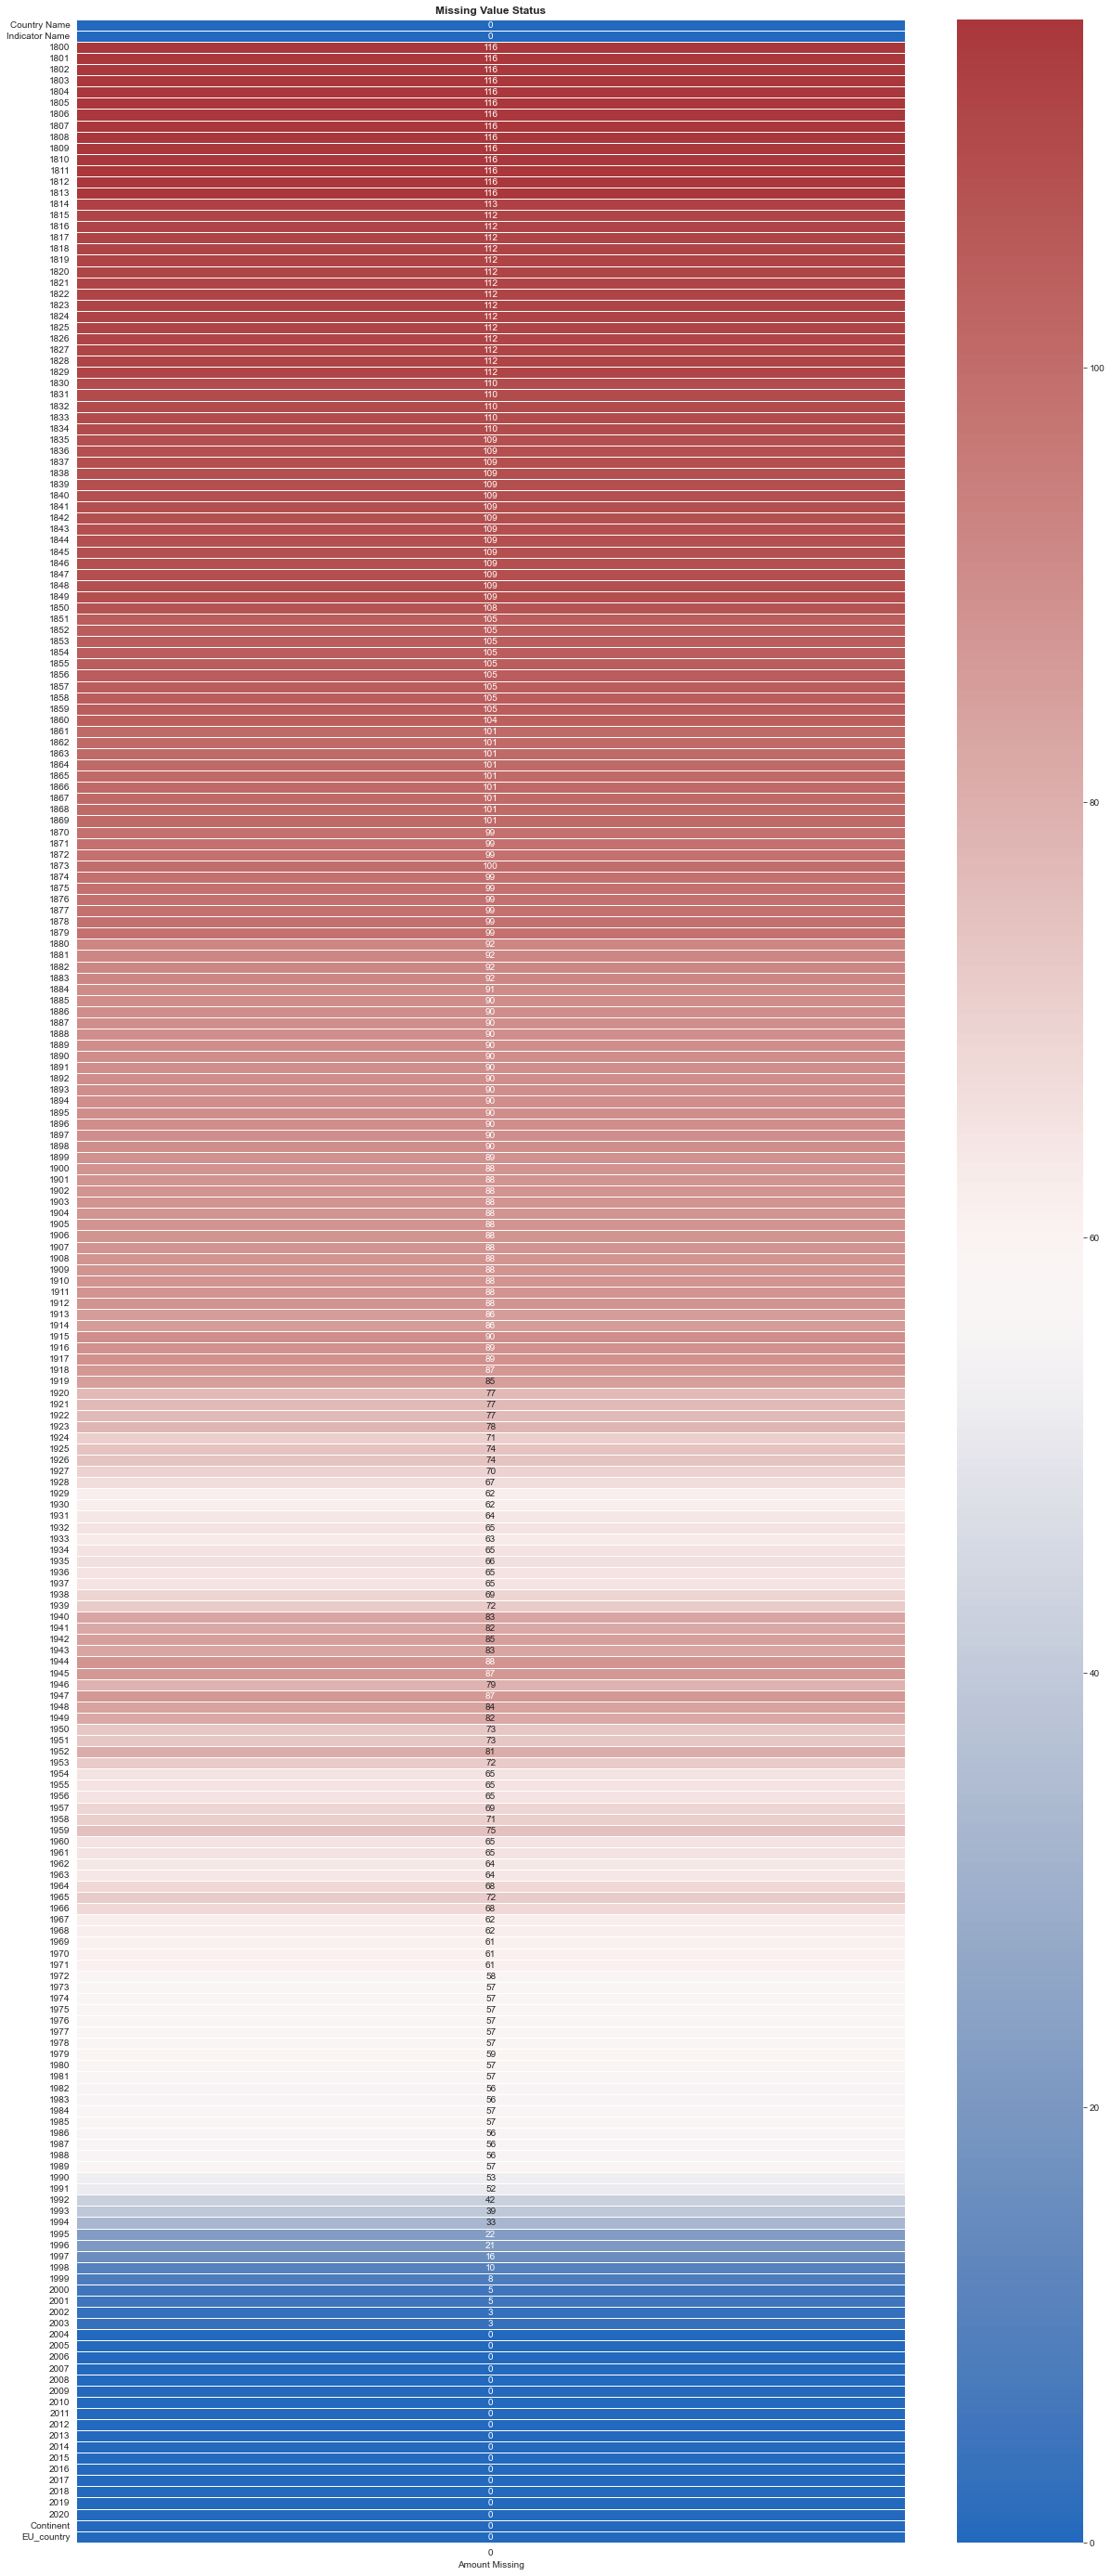

In [136]:
fig, ax = plt.subplots(figsize=(20,50)) 

plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(Europe_df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag', linewidths=.5, ax=ax)
ax.set_xlabel('Amount Missing')
plt.show()

In [137]:
# Transform the Europe_df dataframe (convert years from rows into column)
id_vars=['Country Name', 'Indicator Name', 'Continent','EU_country']
Europe_df2 = pd.melt(frame=Europe_df, id_vars=id_vars, var_name='year', value_name='Value')
Europe_df2['year'] = Europe_df2['year'].astype(int) # convert from object to float or int
Europe_df2.head(6)

Country Name         Indicator Name Continent EU_country  year  Value
0       Poland  Gross Government Debt    Europe        yes  1800    NaN
1     Portugal  Gross Government Debt    Europe        yes  1800    NaN
2      Romania  Gross Government Debt    Europe        yes  1800    NaN
3       Russia  Gross Government Debt    Europe         no  1800    NaN
4   San Marino  Gross Government Debt    Europe         no  1800    NaN
5       Serbia  Gross Government Debt    Europe         no  1800    NaN

In [138]:
# Define functions for calculation of the indicators

def calculate_Gross_Domestic_Product (Gross_Government_Debt, Debt_to_GDP_Ratio):
    Gross_Domestic_Product = (Gross_Government_Debt / Debt_to_GDP_Ratio) * 100
    return Gross_Domestic_Product

def calculate_Gross_Government_Debt (Gross_Domestic_Product, Debt_to_GDP_Ratio):
    Gross_Government_Debt = (Gross_Domestic_Product * Debt_to_GDP_Ratio) / 100
    return Gross_Government_Debt

def calculate_Debt_to_GDP_Ratio (Gross_Domestic_Product, Gross_Government_Debt):
    Debt_to_GDP_Ratio = (Gross_Government_Debt / Gross_Domestic_Product) * 100
    return Debt_to_GDP_Ratio

In [139]:
def fillna_indicator(dataframe):
    
    # 1. If there is more than 1 indicator value missing, return the original dataframe
    if (dataframe.isna()["Value"].sum()) > 1:
        return dataframe
    
    else:
#         # Calculate missing Gross Government Debt
#         print(dataframe.loc[dataframe["Indicator Name"]=="Gross Domestic Product"])
        
        if dataframe.loc[dataframe["Indicator Name"]=="Gross Government Debt"].isna()["Value"].iloc[0] == True:

            Gross_Domestic_Product = dataframe.loc[dataframe["Indicator Name"]=="Gross Domestic Product", "Value"].iloc[0]
            Debt_to_GDP_Ratio = dataframe.loc[dataframe["Indicator Name"]=="Debt to GDP Ratio", "Value"].iloc[0]
            dataframe.loc[dataframe["Indicator Name"]=="Gross Government Debt", "Value"] = calculate_Gross_Government_Debt(Gross_Domestic_Product, Debt_to_GDP_Ratio)
        
    
        # Calculate missing Gross Domestic Product
        elif dataframe.loc[dataframe["Indicator Name"]=="Gross Domestic Product"].isna()["Value"].iloc[0] == True:
            
            if dataframe.shape[0] == 0:
                print(dataframe)
                
            Gross_Government_Debt = dataframe.loc[dataframe["Indicator Name"]=="Gross Government Debt", "Value"].iloc[0]
            Debt_to_GDP_Ratio = dataframe.loc[dataframe["Indicator Name"]=="Debt to GDP Ratio", "Value"].iloc[0]
            dataframe.loc[dataframe["Indicator Name"]=="Gross Domestic Product", "Value"] = calculate_Gross_Domestic_Product (Gross_Government_Debt, Debt_to_GDP_Ratio)
            # return dataframe
        
        
        # Calculate missing Debt to GDP Ratio
        elif dataframe.loc[dataframe["Indicator Name"]=="Debt to GDP Ratio"].isna()["Value"].iloc[0] == True:

            Gross_Government_Debt = dataframe.loc[dataframe["Indicator Name"]=="Gross Government Debt", "Value"].iloc[0]
            Gross_Domestic_Product = dataframe.loc[dataframe["Indicator Name"]=="Gross Domestic Product", "Value"].iloc[0]
            dataframe.loc[dataframe["Indicator Name"]=="Debt to GDP Ratio", "Value"] = calculate_Debt_to_GDP_Ratio (Gross_Domestic_Product, Gross_Government_Debt)

    return dataframe

In [140]:
df2.groupby(["Country Name", "year"], as_index=False, observed=True).size().sort_values(by="size")

Country Name  year  size
0          Albania  1800     3
26663     Pakistan  1943     3
26664     Pakistan  1944     3
26665     Pakistan  1945     3
26666     Pakistan  1946     3
...            ...   ...   ...
13334      Georgia  1874     3
13335      Georgia  1875     3
13336      Georgia  1876     3
13329      Georgia  1869     3
40000     Zimbabwe  2020     3

[40001 rows x 3 columns]

#### Europe filling NAN with functions

In [141]:
new = Europe_df2.groupby(["Country Name", "year"], as_index=False).apply(fillna_indicator)

In [142]:
new

Country Name         Indicator Name Continent EU_country  year  \
0           Poland  Gross Government Debt    Europe        yes  1800   
1         Portugal  Gross Government Debt    Europe        yes  1800   
2          Romania  Gross Government Debt    Europe        yes  1800   
3           Russia  Gross Government Debt    Europe         no  1800   
4       San Marino  Gross Government Debt    Europe         no  1800   
...            ...                    ...       ...        ...   ...   
26515      Austria  Gross Government Debt    Europe        yes  2020   
26516      Denmark      Debt to GDP Ratio    Europe        yes  2020   
26517  Switzerland  Gross Government Debt    Europe         no  2020   
26518      Ukraine  Gross Government Debt    Europe         no  2020   
26519      Denmark  Gross Government Debt    Europe        yes  2020   

                  Value  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
26515   309,474,644,095  
26516                46  
26517   294,580,917,432  
26518 2,483,819,288,819  
26519 1,130,020,303,008  

[26520 rows x 6 columns]

In [143]:
Europe_df2[(Europe_df2["Country Name"]=="Romania")&(Europe_df2["year"]==1994)]

Country Name          Indicator Name Continent EU_country  year  \
23282      Romania   Gross Government Debt    Europe        yes  1994   
23291      Romania       Debt to GDP Ratio    Europe        yes  1994   
23376      Romania  Gross Domestic Product    Europe        yes  1994   

              Value  
23282           NaN  
23291            14  
23376 5,059,986,184

In [144]:
new[(new["Country Name"]=="Romania")&(new["year"]==1994)]

Country Name          Indicator Name Continent EU_country  year  \
23282      Romania   Gross Government Debt    Europe        yes  1994   
23291      Romania       Debt to GDP Ratio    Europe        yes  1994   
23376      Romania  Gross Domestic Product    Europe        yes  1994   

              Value  
23282   730,545,625  
23291            14  
23376 5,059,986,184

In [145]:
Europe_df2[(Europe_df2["Country Name"]=="North Macedonia")&(Europe_df2["year"]==1998)]

Country Name          Indicator Name Continent EU_country  year  \
23777  North Macedonia  Gross Domestic Product    Europe         no  1998   
23864  North Macedonia   Gross Government Debt    Europe         no  1998   
23865  North Macedonia       Debt to GDP Ratio    Europe         no  1998   

                Value  
23777 205,028,838,972  
23864             NaN  
23865              35

In [146]:
new[(new["Country Name"]=="North Macedonia")&(new["year"]==1998)]

Country Name          Indicator Name Continent EU_country  year  \
23777  North Macedonia  Gross Domestic Product    Europe         no  1998   
23864  North Macedonia   Gross Government Debt    Europe         no  1998   
23865  North Macedonia       Debt to GDP Ratio    Europe         no  1998   

                Value  
23777 205,028,838,972  
23864  70,771,649,607  
23865              35

In [147]:
print('New missing data in Europe:',(len(new[new.isna().any(axis=1)]) / len(new))*100) 

New missing data in Europe: 64.10633484162896


#### EU filling NAN with functions

In [148]:
# Transform the Europe_df dataframe (convert years from rows into column)
id_vars=['Country Name', 'Indicator Name', 'Continent','EU_country']
EU_df2 = pd.melt(frame=EU_df, id_vars=id_vars, var_name='year', value_name='Value')
EU_df2['year'] = EU_df2['year'].astype(int) # convert from object to float or int
EU_df2.head(6)

Country Name          Indicator Name Continent EU_country  year  Value
0       Poland   Gross Government Debt    Europe        yes  1800    NaN
1     Portugal   Gross Government Debt    Europe        yes  1800    NaN
2      Romania   Gross Government Debt    Europe        yes  1800    NaN
3        Spain  Gross Domestic Product    Europe        yes  1800    NaN
4      Belgium  Gross Domestic Product    Europe        yes  1800    NaN
5     Portugal       Debt to GDP Ratio    Europe        yes  1800    NaN

In [149]:
new_EU = EU_df2.groupby(["Country Name", "year"], as_index=False).apply(fillna_indicator)

In [150]:
new_EU

Country Name          Indicator Name Continent EU_country  year  \
0           Poland   Gross Government Debt    Europe        yes  1800   
1         Portugal   Gross Government Debt    Europe        yes  1800   
2          Romania   Gross Government Debt    Europe        yes  1800   
3            Spain  Gross Domestic Product    Europe        yes  1800   
4          Belgium  Gross Domestic Product    Europe        yes  1800   
...            ...                     ...       ...        ...   ...   
16570      Germany  Gross Domestic Product    Europe        yes  2020   
16571     Bulgaria   Gross Government Debt    Europe        yes  2020   
16572      Austria   Gross Government Debt    Europe        yes  2020   
16573      Denmark       Debt to GDP Ratio    Europe        yes  2020   
16574      Denmark   Gross Government Debt    Europe        yes  2020   

                  Value  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
16570 3,429,437,539,143  
16571    27,308,518,829  
16572   309,474,644,095  
16573                46  
16574 1,130,020,303,008  

[16575 rows x 6 columns]

In [151]:
EU_df2[(EU_df2["Country Name"]=="Bulgaria")&(EU_df2["year"]==1994)]

Country Name          Indicator Name Continent EU_country  year  \
14560     Bulgaria  Gross Domestic Product    Europe        yes  1994   
14577     Bulgaria       Debt to GDP Ratio    Europe        yes  1994   
14621     Bulgaria   Gross Government Debt    Europe        yes  1994   

            Value  
14560 536,680,020  
14577         172  
14621         NaN

In [152]:
new_EU[(new_EU["Country Name"]=="Bulgaria")&(new_EU["year"]==1994)]

Country Name          Indicator Name Continent EU_country  year  \
14560     Bulgaria  Gross Domestic Product    Europe        yes  1994   
14577     Bulgaria       Debt to GDP Ratio    Europe        yes  1994   
14621     Bulgaria   Gross Government Debt    Europe        yes  1994   

            Value  
14560 536,680,020  
14577         172  
14621 924,715,775

In [153]:
print('New missing data in EU:',(len(new_EU[new_EU.isna().any(axis=1)]) / len(new_EU))*100) 

New missing data in EU: 57.134238310708895


### Filling consecutive nan values with interpolation

In [154]:
def interpolate_3_consecut(dataframe):
    
    if dataframe["Value"].isna().cumsum().max() == 0:
        return dataframe
    
    elif dataframe["Value"].isna().cumsum().max() == 1 or dataframe["Value"].isna().cumsum().max() == 2 or dataframe["Value"].isna().cumsum().max() == 3:
        dataframe["Value"].interpolate(inplace=True)
        
    elif dataframe["Value"].isna().cumsum().max() > 3:
        return dataframe
        
    return dataframe

In [155]:
# Apply na funkcijata
df_int_Europe = new.groupby(["Country Name", "Indicator Name"], as_index=False).apply(interpolate_3_consecut) 

In [156]:
print('New missing data in Europe after interpolation:',(len(df_int_Europe[df_int_Europe.isna().any(axis=1)]) / len(df_int_Europe))*100) 

New missing data in Europe after interpolation: 64.10633484162896


In [157]:
# Apply na funkcijata
df_int_EU = new_EU.groupby(["Country Name", "Indicator Name"], as_index=False).apply(interpolate_3_consecut) 

In [158]:
print('New missing data in EU after interpolation:',(len(df_int_EU[df_int_EU.isna().any(axis=1)]) / len(df_int_EU))*100) 

New missing data in EU after interpolation: 57.134238310708895


#### Try to fill in with KNN imputer

In [ ]:
# # import knn imputer for filling missing values

# from sklearn.impute import KNNImputer

# transformer = KNNImputer(n_neighbors=3)

# cols = ['windSpeed']
# wind_speed_df[cols] = transformer.fit_transform(wind_speed_df[cols])

In [ ]:
# # Kreiraj funkcija za popolnuvanje na consecutive nan values, no samo ako se 1 ili 2
# cols = ['Value']
# from sklearn.impute import KNNImputer
# def KNN_imputer_3neig(dataframe):
    
#     if dataframe["Value"].isna():
#         return dataframe["Value"].KNNImputer(n_neighbors=3, inplace=True).fit_transform(Value[cols])
        
#     else :
#         return dataframe

In [ ]:
# # Apply na funkcijata
# df_knn_Europe = df_int_Europe.groupby(["Country Name", "Indicator Name"], as_index=False).apply(KNN_imputer_3neig) 

In [92]:
df_Europe_T_yrs = df_int_Europe.pivot(['Country Name', 'Indicator Name', 'Continent', 'EU_country'], 'year',).reset_index()
df_EU_T_yrs = df_int_EU.pivot(['Country Name', 'Indicator Name', 'Continent', 'EU_country'], 'year',).reset_index()

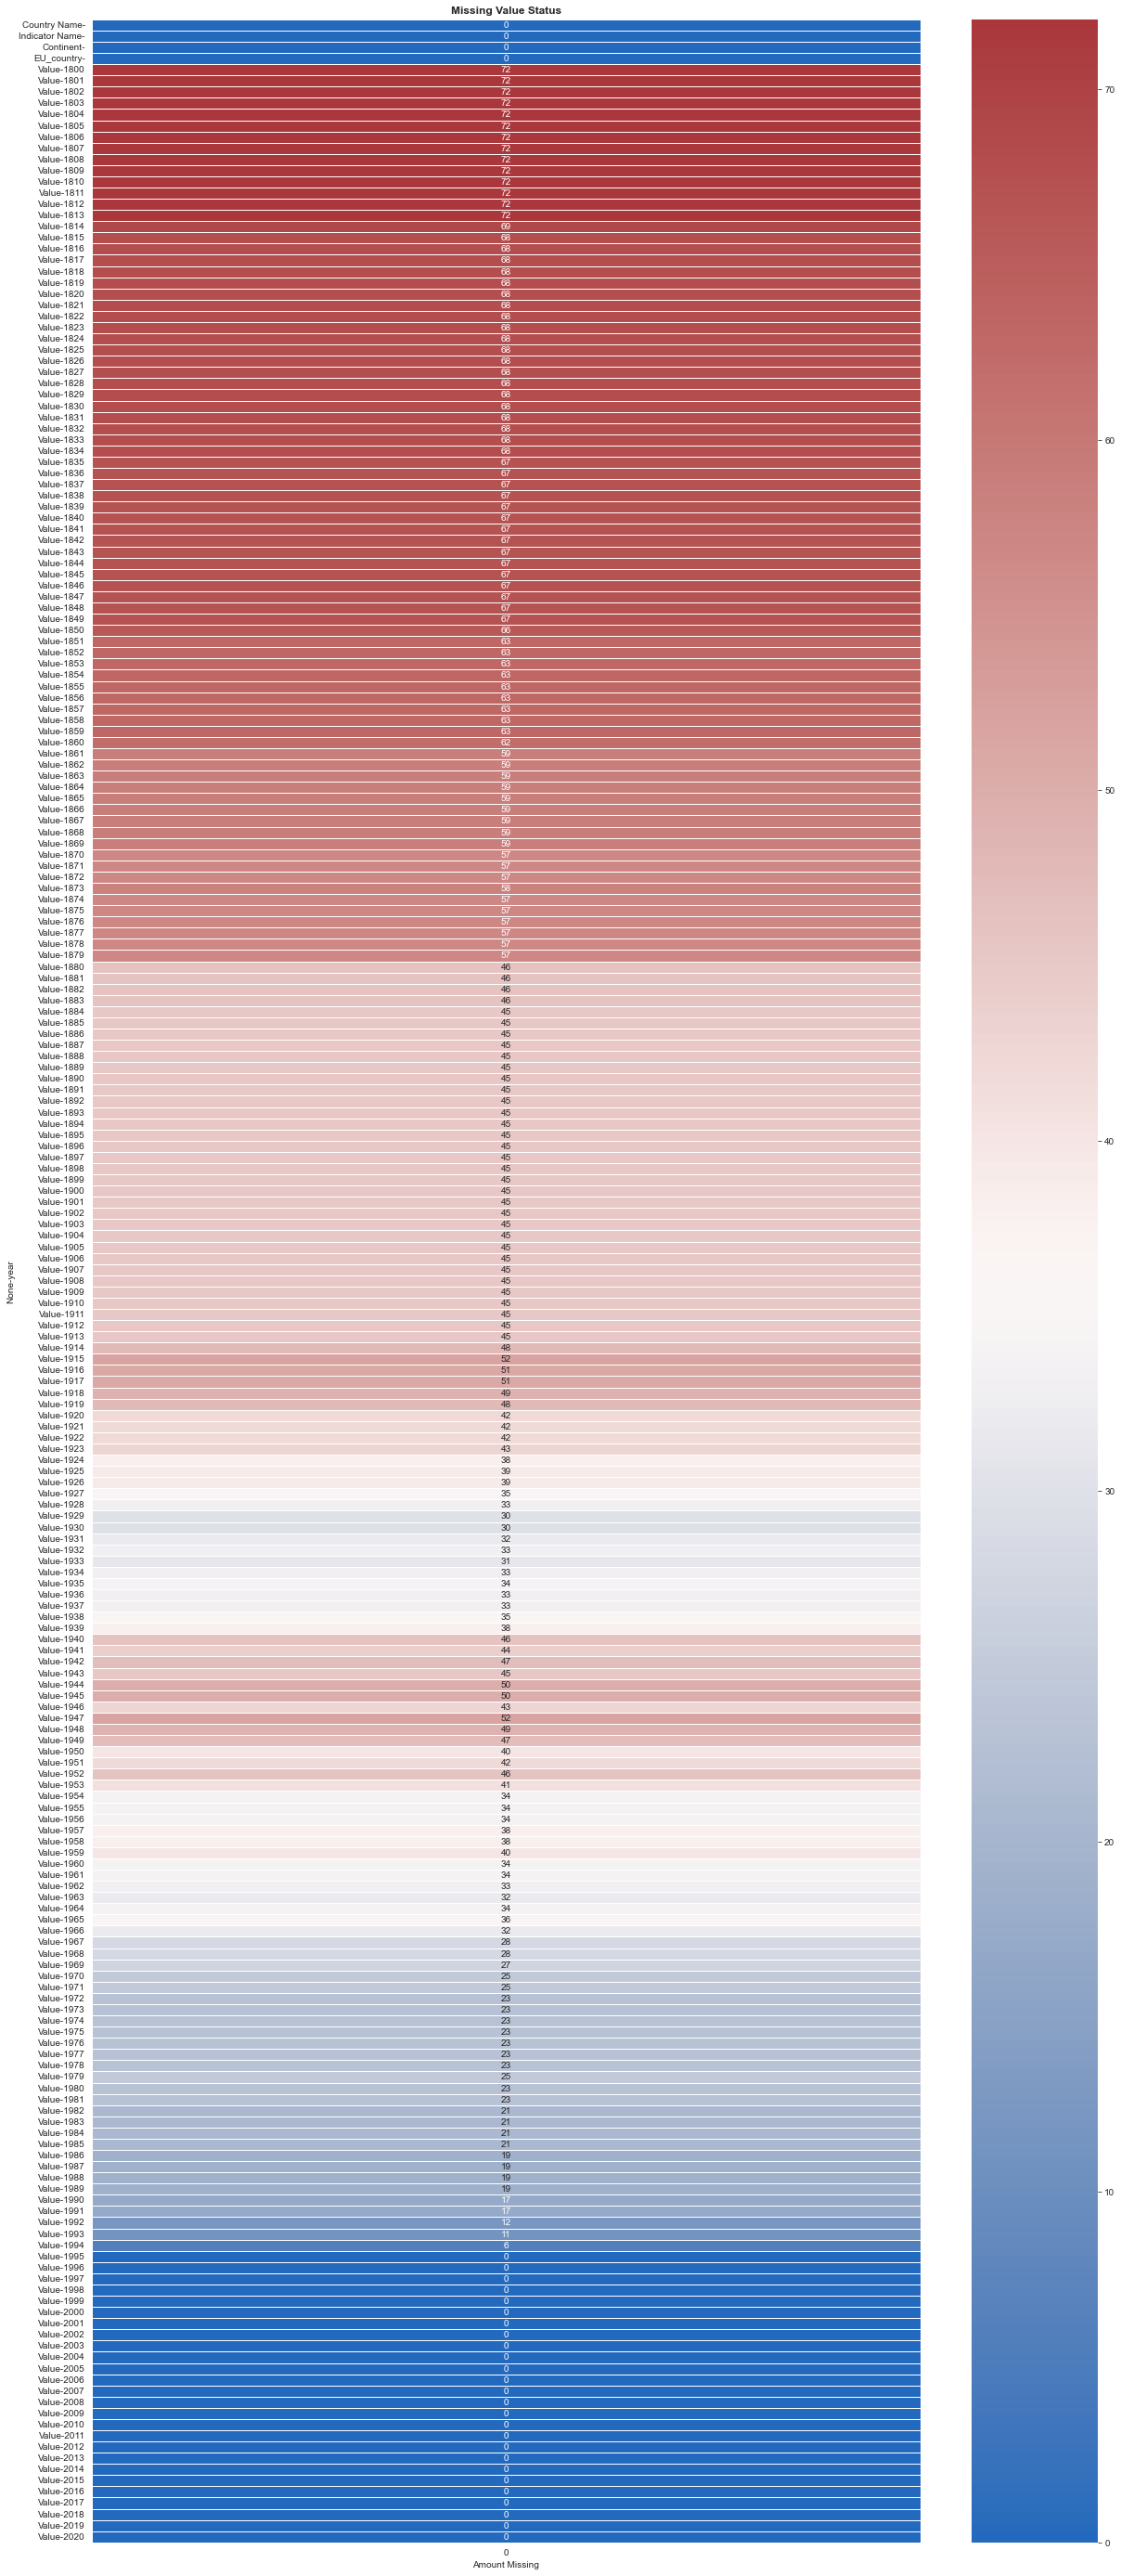

In [93]:
fig, ax = plt.subplots(figsize=(20,50)) 

plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df_EU_T_yrs.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag', linewidths=.5, ax=ax)
ax.set_xlabel('Amount Missing')
plt.show()

In [94]:
df.loc[:,df.isna().any(axis=0)]

1800  1801  1802  1803  1804  1805  1806  1807  1808  1809  ...  \
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
560   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
561   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
562   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
563   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
564   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

                  2011               2012               2013  \
0        7,006,838,075      8,565,531,472     11,765,760,357   
1   13,668,800,981,098 17,602,970,667,209 20,962,517,921,124   
2      108,183,864,783    107,703,729,764    111,017,000,000   
3    4,020,388,000,000  4,288,804,000,000  4,529,800,000,000   
4      851,429,000,000    878,415,000,000    926,116,000,000   
..                 ...                ...                ...   
560  5,038,505,859,181  5,032,621,604,916  5,490,107,638,276   
561    850,862,000,000    850,553,000,000    849,761,000,000   
562     99,488,315,773    104,171,413,534    109,321,259,095   
563        928,483,748        971,440,000      1,040,100,000   
564    571,234,879,434    724,272,807,848    885,381,793,624   

                  2014               2015               2016  \
0       14,827,301,684     15,808,907,375     16,167,806,460   
1   26,335,863,815,556 32,983,671,464,431 38,283,609,104,963   
2      119,303,000,000    135,075,840,432    155,064,336,096   
3    4,602,500,000,000  4,853,521,775,314  5,038,157,525,184   
4      866,502,000,000    914,411,733,479    960,094,518,842   
..                 ...                ...                ...   
560  6,316,088,865,380  7,404,265,127,386  8,454,573,277,785   
561    867,947,000,000    921,452,913,919    977,898,911,516   
562    121,988,458,228    162,433,183,098    210,467,315,202   
563      1,094,860,195      1,152,181,102      1,216,495,578   
564    974,891,150,277    992,391,148,306  1,117,882,771,902   

                  2017               2018               2019  \
0       16,706,474,234     16,670,336,431     16,332,752,618   
1   43,433,234,510,990 49,026,070,143,903 54,626,959,046,258   
2      168,318,380,631    178,352,836,680    186,398,450,606   
3    5,246,268,307,250  5,472,504,737,125  5,722,526,868,731   
4    1,011,376,310,051  1,059,548,644,821  1,101,686,670,284   
..                 ...                ...                ...   
560 10,201,866,017,487 12,040,548,868,911 13,684,189,458,362   
561  1,028,743,342,309  1,071,766,217,728  1,105,833,420,958   
562    233,679,546,551    246,059,114,936    249,317,216,505   
563      1,286,448,129      1,363,222,015      1,448,013,393   
564  1,264,596,438,962  1,401,643,316,877  1,555,439,282,462   

                  2020  
0       15,529,173,474  
1   60,512,160,214,977  
2      199,599,350,960  
3    5,997,654,657,391  
4    1,146,170,457,607  
..                 ...  
560 15,013,512,696,294  
561  1,130,020,303,008  
562    245,448,137,249  
563      1,539,663,660  
564  1,723,106,556,468  

[543 rows x 221 columns]

#### Removing all columns from 1800 to 1990 (for Europe dataframe only). Our dataset will have data for the last 30 years

In [159]:
Europe_df.drop(Europe_df.loc[:, '1800':'1990'], axis = 1, inplace = True)
Europe_df.head(3)

Country Name         Indicator Name           1991           1992  \
4       Poland  Gross Government Debt 65,839,996,338 99,599,998,474   
5     Portugal  Gross Government Debt 38,744,344,519 39,592,195,612   
7      Romania  Gross Government Debt            NaN            NaN   

             1993            1994            1995            1996  \
4 138,300,003,052 152,237,396,240 165,200,000,000 183,294,000,000   
5  40,789,969,064  46,690,620,602  51,962,000,000  54,259,000,000   
7             NaN             NaN             NaN             NaN   

             1997            1998  ...            2013            2014  \
4 221,220,000,000 233,687,000,000  ... 926,116,000,000 866,502,000,000   
5  54,964,000,000  55,489,000,000  ... 219,644,614,553 225,286,798,693   
7   7,096,710,800  10,318,281,700  ... 247,499,100,000 270,338,200,000   

             2015            2016              2017              2018  \
4 914,411,733,479 960,094,518,842 1,011,376,310,051 1,059,548,644,821   
5 226,867,592,901 228,329,456,358   230,020,508,936   233,016,810,672   
7 285,850,729,335 303,806,638,801   327,339,648,760   352,280,462,505   

               2019              2020  Continent  EU_country  
4 1,101,686,670,284 1,146,170,457,607     Europe         yes  
5   236,954,497,187   241,477,865,645     Europe         yes  
7   378,465,841,082   406,434,601,886     Europe         yes  

[3 rows x 34 columns]

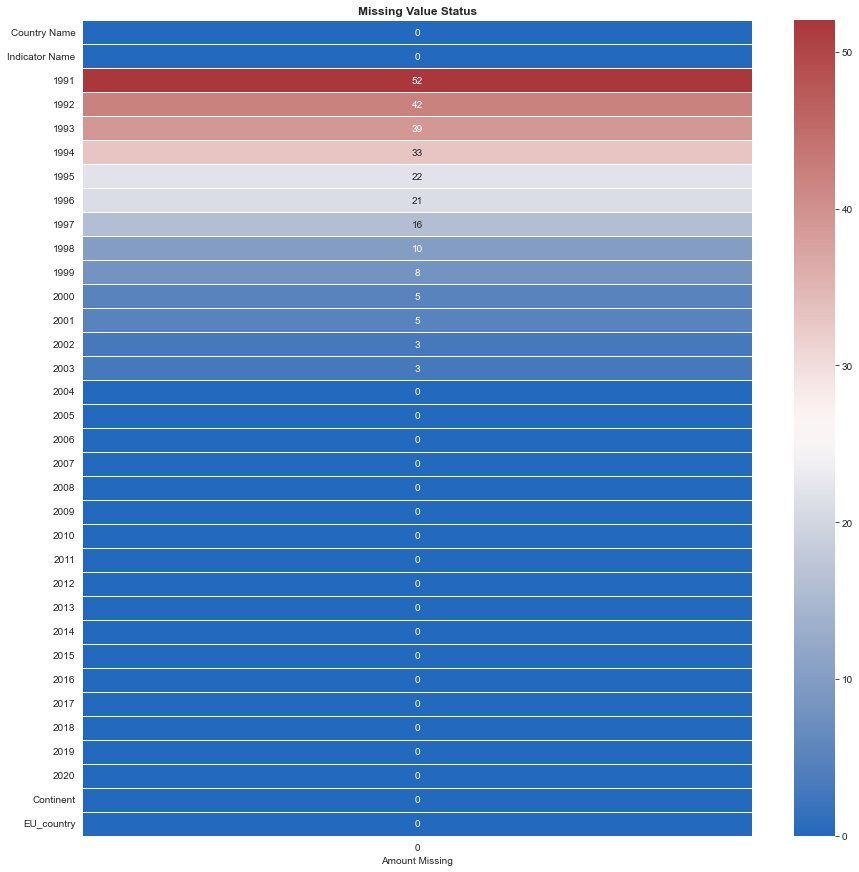

In [160]:
fig, ax = plt.subplots(figsize=(15,15)) 

plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(Europe_df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag', linewidths=.5, ax=ax)
ax.set_xlabel('Amount Missing')
plt.show()

<AxesSubplot:>

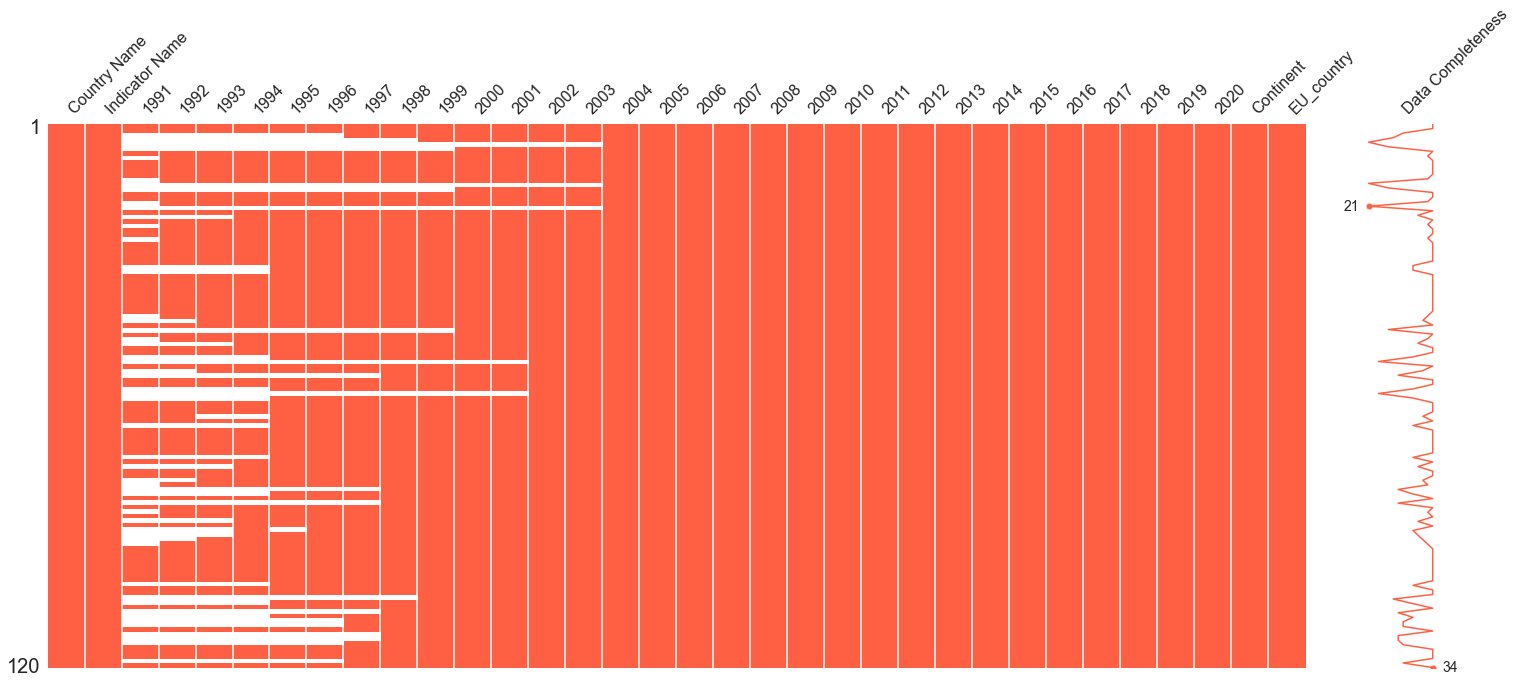

In [167]:
import missingno as msno
msno.matrix(Europe_df, color=(1, 0.38, 0.27), labels=True)

In [97]:
Europe_df

Country Name         Indicator Name           1961           1962  \
4         Poland  Gross Government Debt            NaN            NaN   
5       Portugal  Gross Government Debt     87,549,007    107,361,259   
7        Romania  Gross Government Debt            NaN            NaN   
8         Russia  Gross Government Debt            NaN            NaN   
11    San Marino  Gross Government Debt            NaN            NaN   
..           ...                    ...            ...            ...   
526      Austria  Gross Government Debt 22,349,000,000 23,017,000,000   
532      Denmark      Debt to GDP Ratio             16             15   
544  Switzerland  Gross Government Debt  5,736,600,000  5,480,400,000   
558      Ukraine  Gross Government Debt            NaN            NaN   
561      Denmark  Gross Government Debt  7,476,000,000  7,750,000,000   

              1963           1964          1965           1966           1967  \
4              NaN            NaN           NaN            NaN            NaN   
5      123,357,708    141,040,093   152,482,517    161,675,362    165,361,479   
7              NaN            NaN           NaN            NaN            NaN   
8              NaN            NaN           NaN            NaN            NaN   
11             NaN            NaN           NaN            NaN            NaN   
..             ...            ...           ...            ...            ...   
526 25,062,000,000 26,611,000,000           NaN 29,277,000,000 34,579,000,000   
532             14             15            13             11             10   
544  5,392,800,000            NaN           NaN  4,835,700,000  4,917,600,000   
558            NaN            NaN           NaN            NaN            NaN   
561  7,314,000,000  8,888,000,000 8,821,000,000  8,397,000,000  8,239,000,000   

              1968  ...              2013               2014  \
4              NaN  ...   926,116,000,000    866,502,000,000   
5      166,119,652  ...   219,644,614,553    225,286,798,693   
7              NaN  ...   247,499,100,000    270,338,200,000   
8              NaN  ... 9,285,800,000,000 12,723,245,312,937   
11             NaN  ...       292,600,000        307,530,178   
..             ...  ...               ...                ...   
526 39,841,000,000  ...   260,977,000,000    278,089,000,000   
532              9  ...                45                 45   
544  5,078,900,000  ...   299,020,628,661    298,455,405,522   
558            NaN  ...   595,637,458,129  1,115,714,087,463   
561  8,357,000,000  ...   849,761,000,000    867,947,000,000   

                  2015               2016               2017  \
4      914,411,733,479    960,094,518,842  1,011,376,310,051   
5      226,867,592,901    228,329,456,358    230,020,508,936   
7      285,850,729,335    303,806,638,801    327,339,648,760   
8   15,224,881,264,013 16,961,682,712,006 19,174,127,002,411   
11         322,881,190        340,033,555        360,088,135   
..                 ...                ...                ...   
526    290,402,095,777    295,602,311,627    299,714,518,848   
532                 47                 48                 48   
544    297,103,754,788    295,831,950,035    294,879,970,658   
558  1,869,428,495,288  2,082,390,396,090  2,258,463,161,186   
561    921,452,913,919    977,898,911,516  1,028,743,342,309   

                  2018               2019               2020  Continent  \
4    1,059,548,644,821  1,101,686,670,284  1,146,170,457,607     Europe   
5      233,016,810,672    236,954,497,187    241,477,865,645     Europe   
7      352,280,462,505    378,465,841,082    406,434,601,886     Europe   
8   21,165,235,755,437 22,329,562,679,612 23,609,317,970,599     Europe   
11         381,348,321        403,710,439        426,379,488     Europe   
..                 ...                ...                ...        ...   
526    303,196,083,376    306,132,888,515    309,474,644,095     Europe   
532             

In [168]:
# Transform the Europe_df dataframe (convert years from rows into column)
id_vars=['Country Name', 'Indicator Name', 'Continent','EU_country']
Europe_df2 = pd.melt(frame=Europe_df, id_vars=id_vars, var_name='year', value_name='Value')
Europe_df2['year'] = Europe_df2['year'].astype(int) # convert from object to float or int
Europe_df2.head(6)

print('New missing data in Europe after removing 191 years:',(len(Europe_df2[Europe_df2.isna().any(axis=1)]) / len(Europe_df2))*100) 

#df.groupby('Country Name').agg({'Indicator Name':'sum'})

New missing data in Europe after removing 191 years: 7.194444444444445


<function matplotlib.pyplot.show(close=None, block=None)>

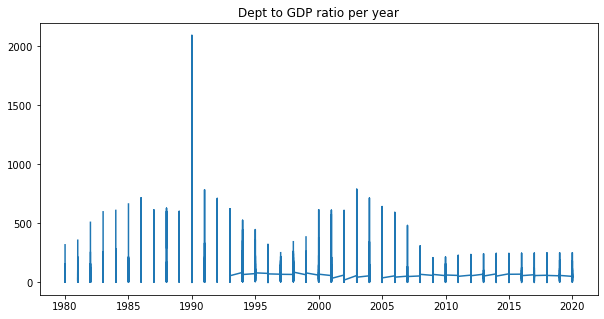

In [53]:
# Plot the Dept to GDP ratio per year (total dataset)

fig = plt.figure(figsize=(10,5))

x = Ratio_df2["year"]
y = Ratio_df2["Value"]
plt.title("Dept to GDP ratio per year")

plt.plot(x,y)
plt.show

In [37]:
# Max value of Dept to GDP ratio 

max_ratio = Ratio_df2["Value"].max()
max_ratio

2092.92

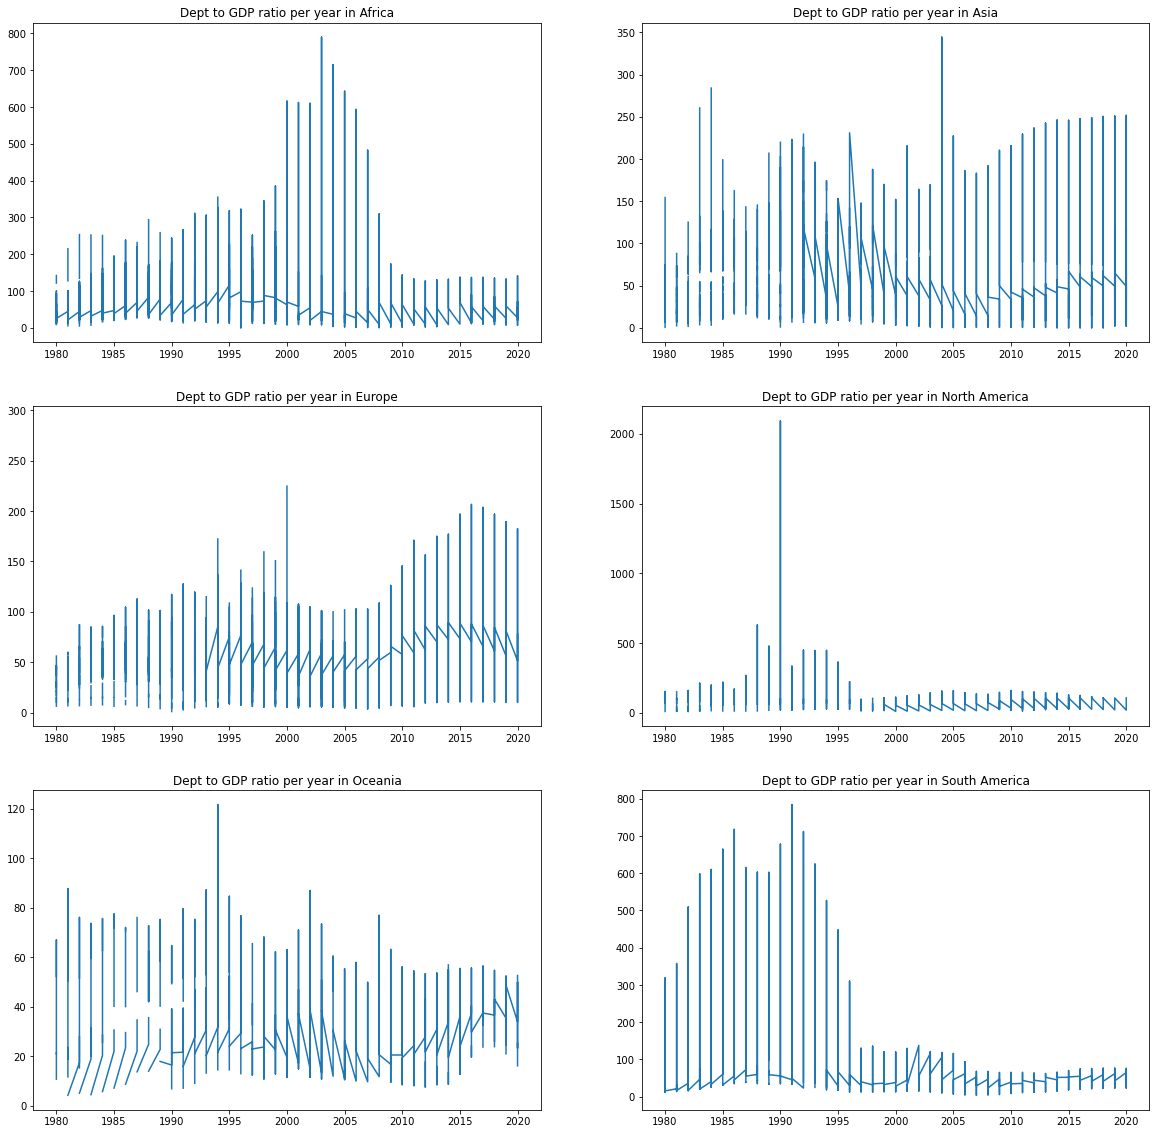

In [50]:
# Plot the Dept to GDP ratio per year per continent (list my_lables)

a = 3 #number of rows 
b = 2 #num of columns
c = 1 #init counter

fig = plt.figure(figsize=(20,20))

for continent in my_lables:
    
    plt.subplot(a, b, c)
    x = Ratio_df2[Ratio_df2["Continent"]==continent]["year"]
    y = Ratio_df2[Ratio_df2["Continent"]==continent]["Value"]
    plt.plot(x,y)
    plt.title(f"Dept to GDP ratio per year in {continent}")
    c = c+1

plt.show()

In [65]:
my_lables

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [66]:
# Create list of coutries per Continent

Africa_countries = list(df2[df2["Continent"]=="Africa"]["Country Name"].unique())
Asia_countries = list(df2[df2["Continent"]=="Asia"]["Country Name"].unique())
Europe_countries = list(df2[df2["Continent"]=="Europe"]["Country Name"].unique())
NorthAmerica_countries = list(df2[df2["Continent"]=="North America"]["Country Name"].unique())
Oceania_countries = list(df2[df2["Continent"]=="Oceania"]["Country Name"].unique())
SouthAmerica_countries = list(df2[df2["Continent"]=="South America"]["Country Name"].unique())

Dept to GDP ratio per country in AFRICA:


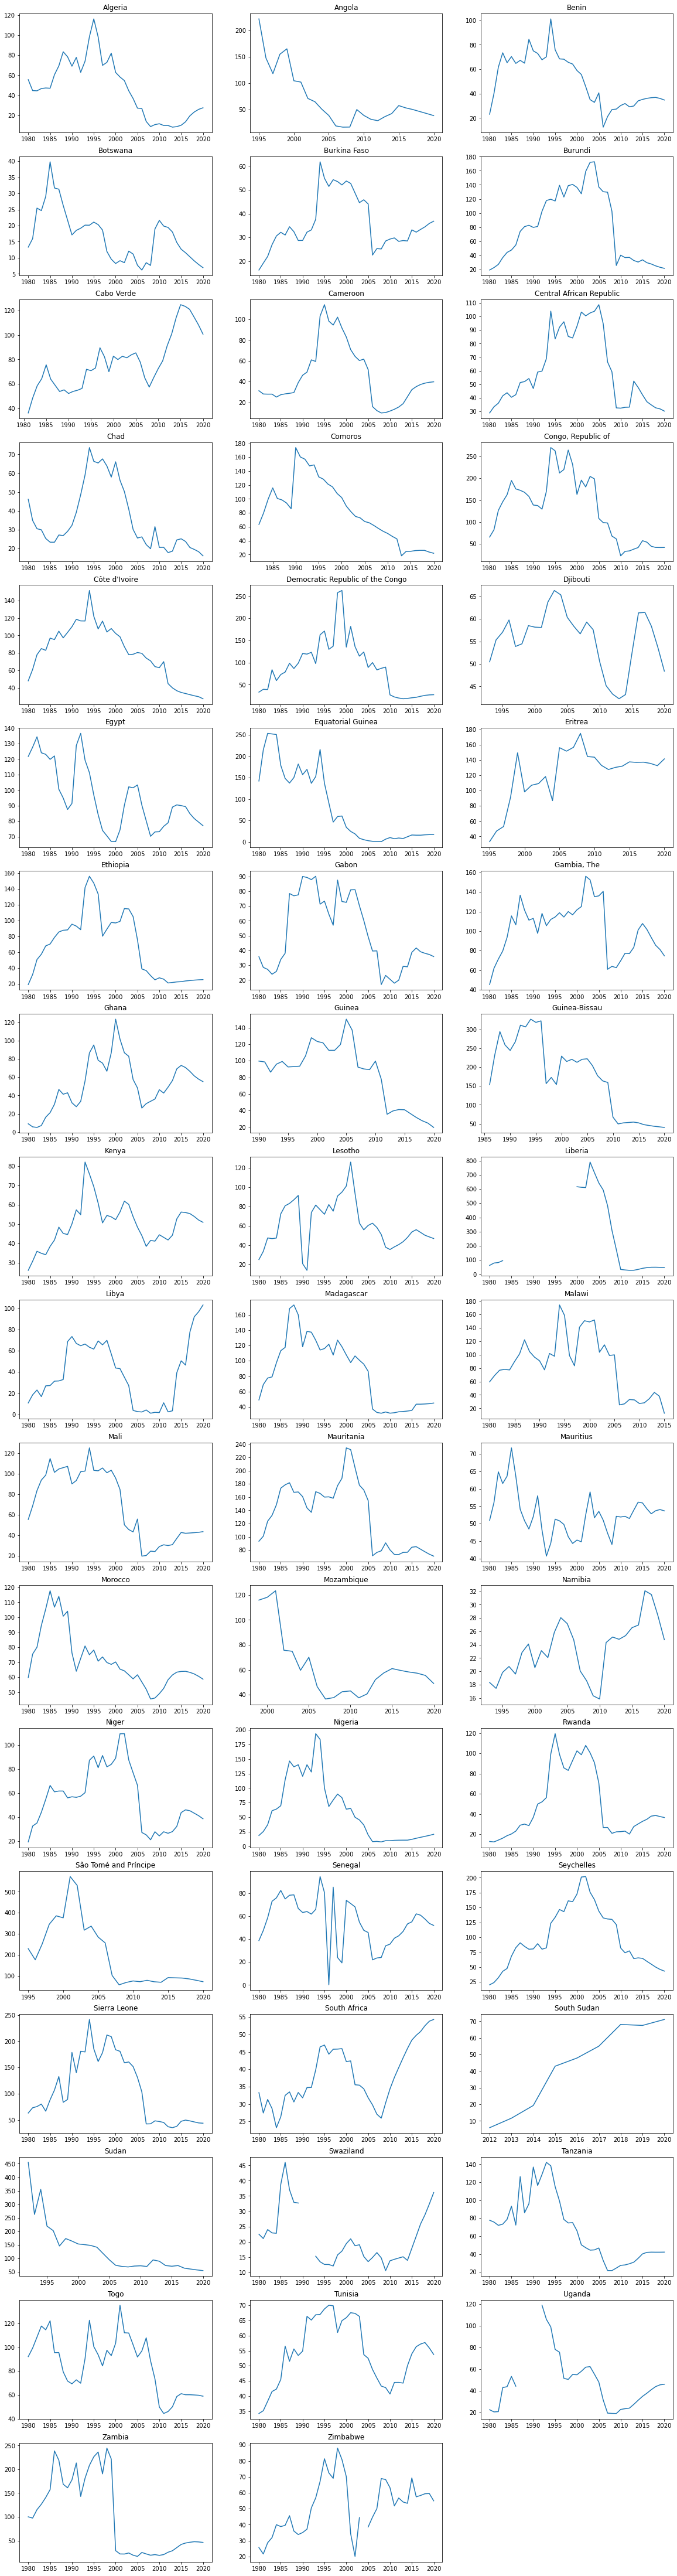

In [67]:
# Plot the Dept to GDP ratio per year per country in AFRICA

print("Dept to GDP ratio per country in AFRICA:")

a = 18 #number of rows 
b = 3 #num of columns
c = 1 #init counter

continent = "Africa"

fig = plt.figure(figsize=(20,80))

for country in Africa_countries:
    
    plt.subplot(a, b, c)
    x = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["year"]
    y = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["Value"]
    plt.plot(x,y)
    plt.title(country)
    c = c+1

plt.show()

Dept to GDP ratio per country in ASIA:


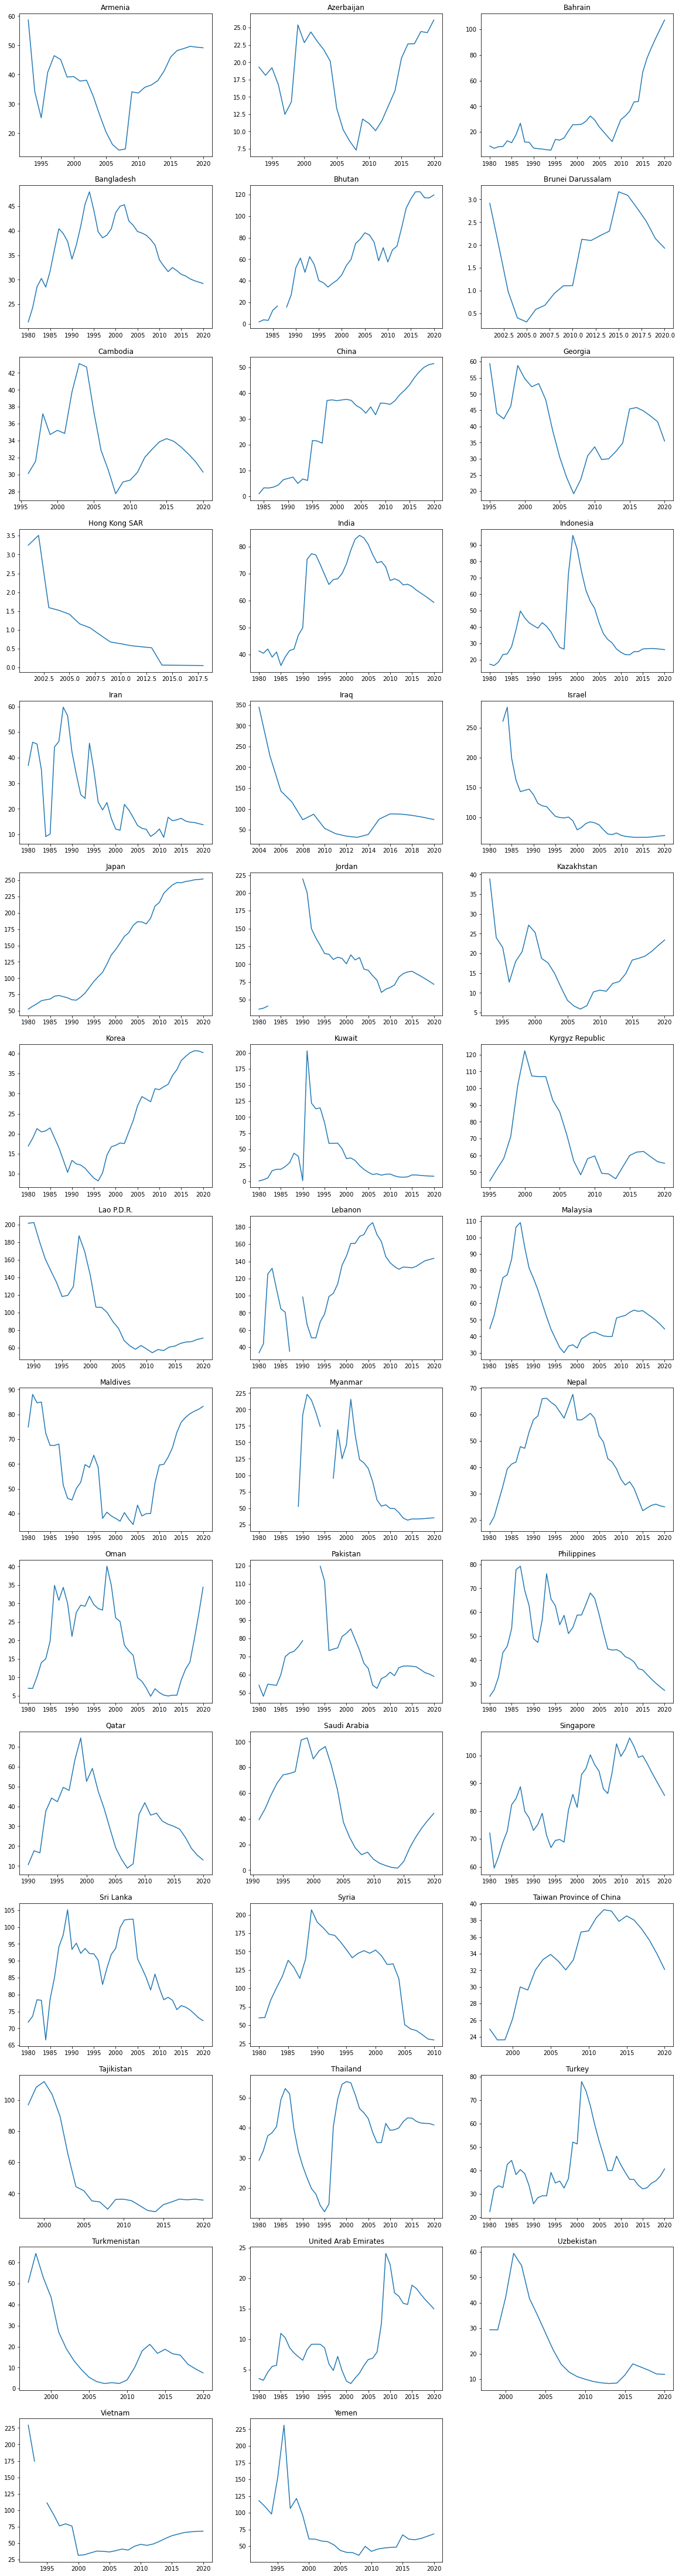

In [69]:
# Plot the Dept to GDP ratio per year per country in ASIA

print("Dept to GDP ratio per country in ASIA:")

a = 15 #number of rows 
b = 3 #num of columns
c = 1 #init counter

continent = "Asia"

fig = plt.figure(figsize=(20,80))

for country in Asia_countries:
    
    plt.subplot(a, b, c)
    x = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["year"]
    y = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["Value"]
    plt.plot(x,y)
    plt.title(country)
    c = c+1

plt.show()

Dept to GDP ratio per country in NORTH AMERICA:


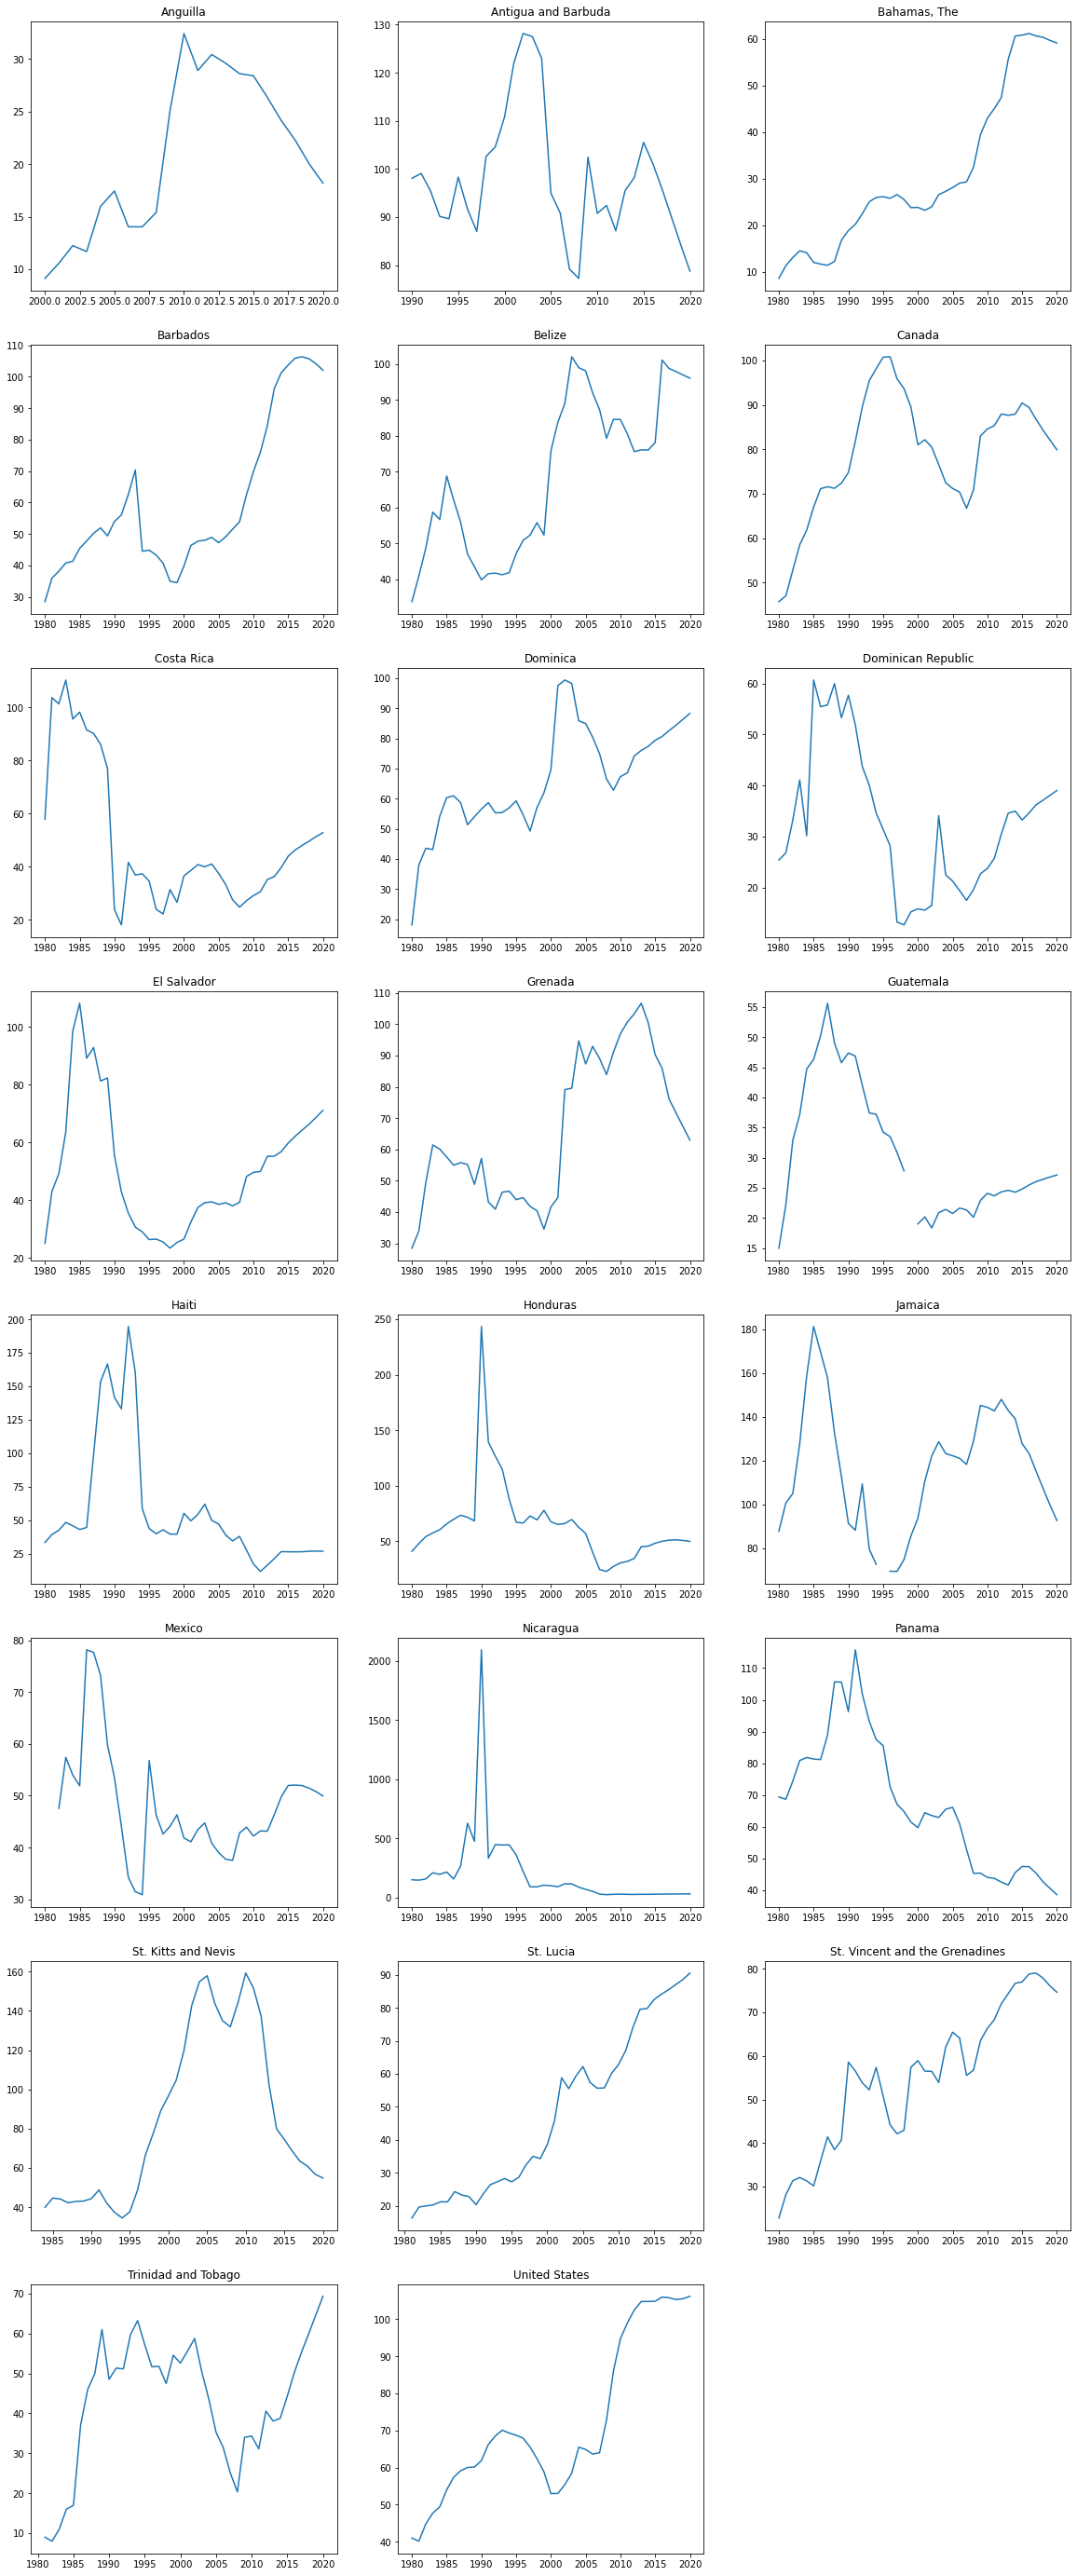

In [72]:
# Plot the Dept to GDP ratio per year per country in NORTH AMERICA

print("Dept to GDP ratio per country in NORTH AMERICA:")

a = 8 #number of rows 
b = 3 #num of columns
c = 1 #init counter

continent = "North America"

fig = plt.figure(figsize=(20,50))

for country in NorthAmerica_countries:
    
    plt.subplot(a, b, c)
    x = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["year"]
    y = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["Value"]
    plt.plot(x,y)
    plt.title(country)
    c = c+1

plt.show()

Dept to GDP ratio per country in SOUTH AMERICA:


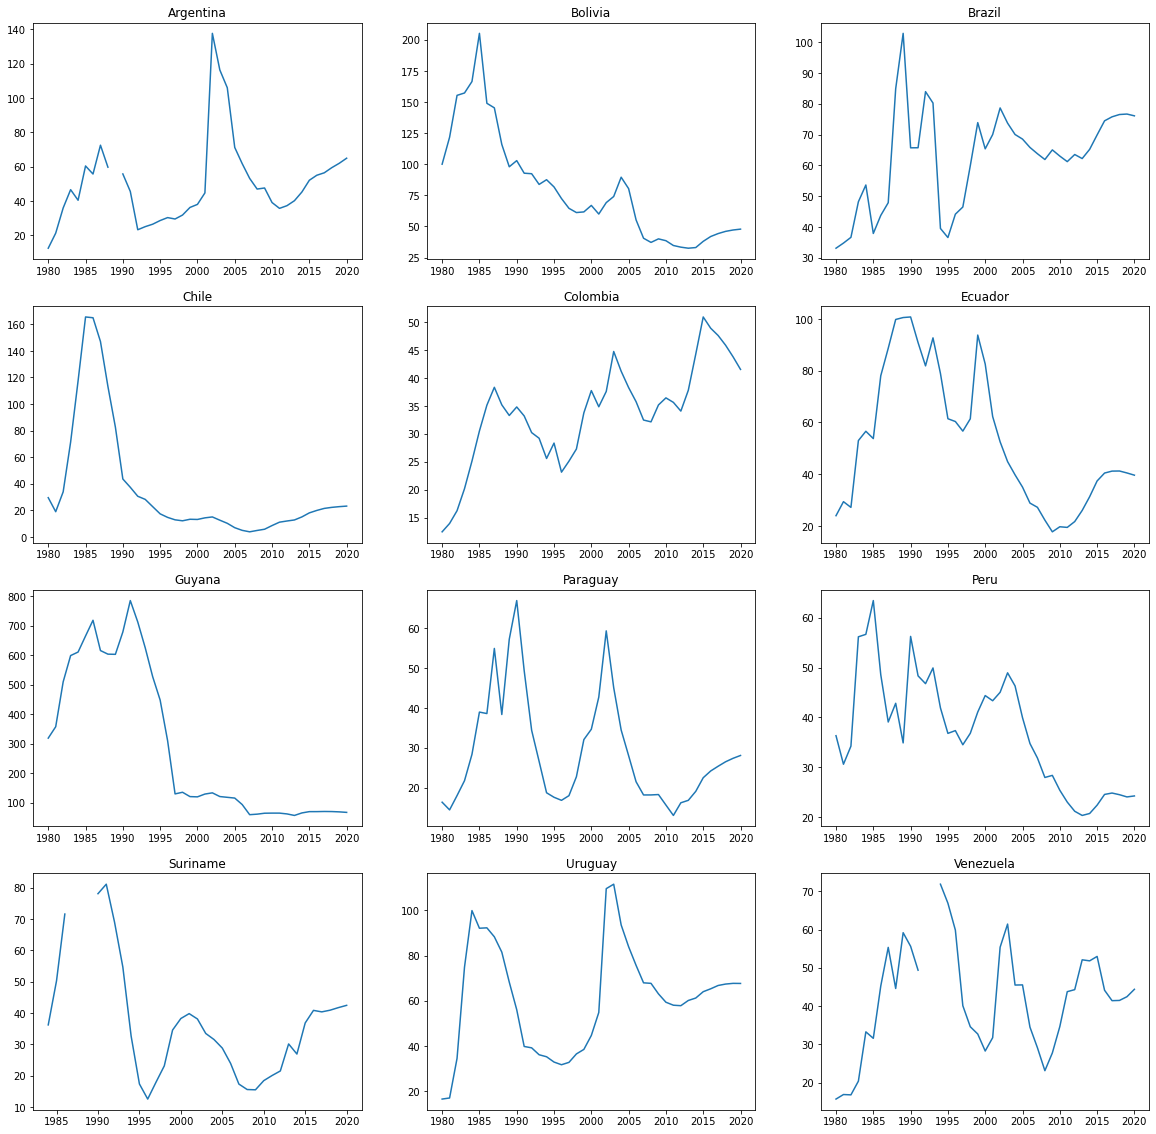

In [76]:
# Plot the Dept to GDP ratio per year per country in SOUTH AMERICA

print("Dept to GDP ratio per country in SOUTH AMERICA:")

a = 4 #number of rows 
b = 3 #num of columns
c = 1 #init counter

continent = "South America"

fig = plt.figure(figsize=(20,20))

for country in SouthAmerica_countries:
    
    plt.subplot(a, b, c)
    x = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["year"]
    y = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["Value"]
    plt.plot(x,y)
    plt.title(country)
    c = c+1

plt.show()

Dept to GDP ratio per country in OCEANIA:


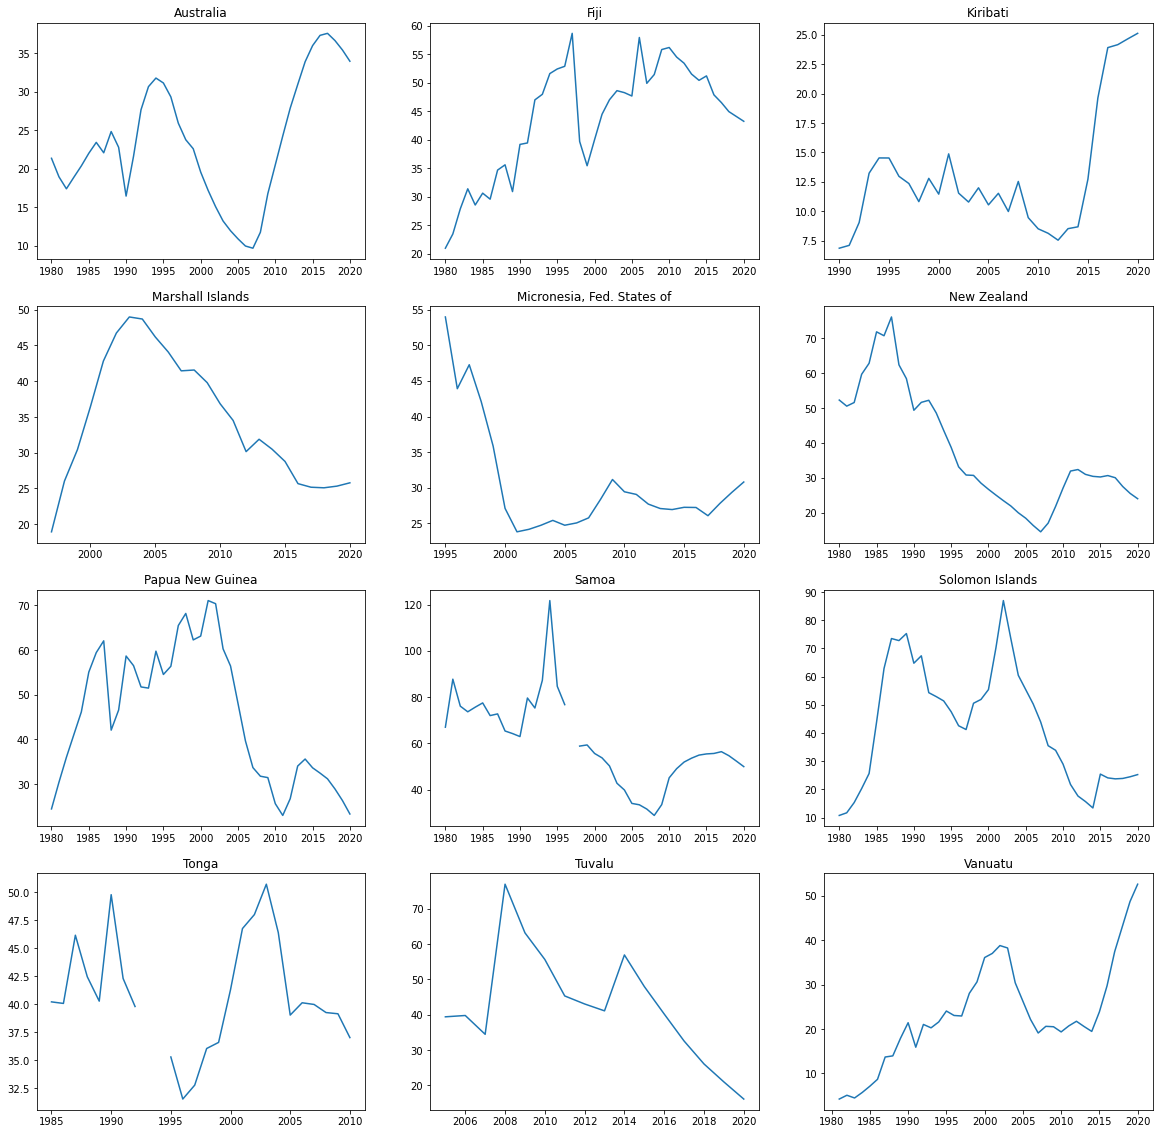

In [77]:
# Plot the Dept to GDP ratio per year per country in OCEANIA

print("Dept to GDP ratio per country in OCEANIA:")

a = 4 #number of rows 
b = 3 #num of columns
c = 1 #init counter

continent = "Oceania"

fig = plt.figure(figsize=(20,20))

for country in Oceania_countries:
    
    plt.subplot(a, b, c)
    x = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["year"]
    y = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["Value"]
    plt.plot(x,y)
    plt.title(country)
    c = c+1

plt.show()

### EUROPE

Dept to GDP ratio per country in EUROPE:


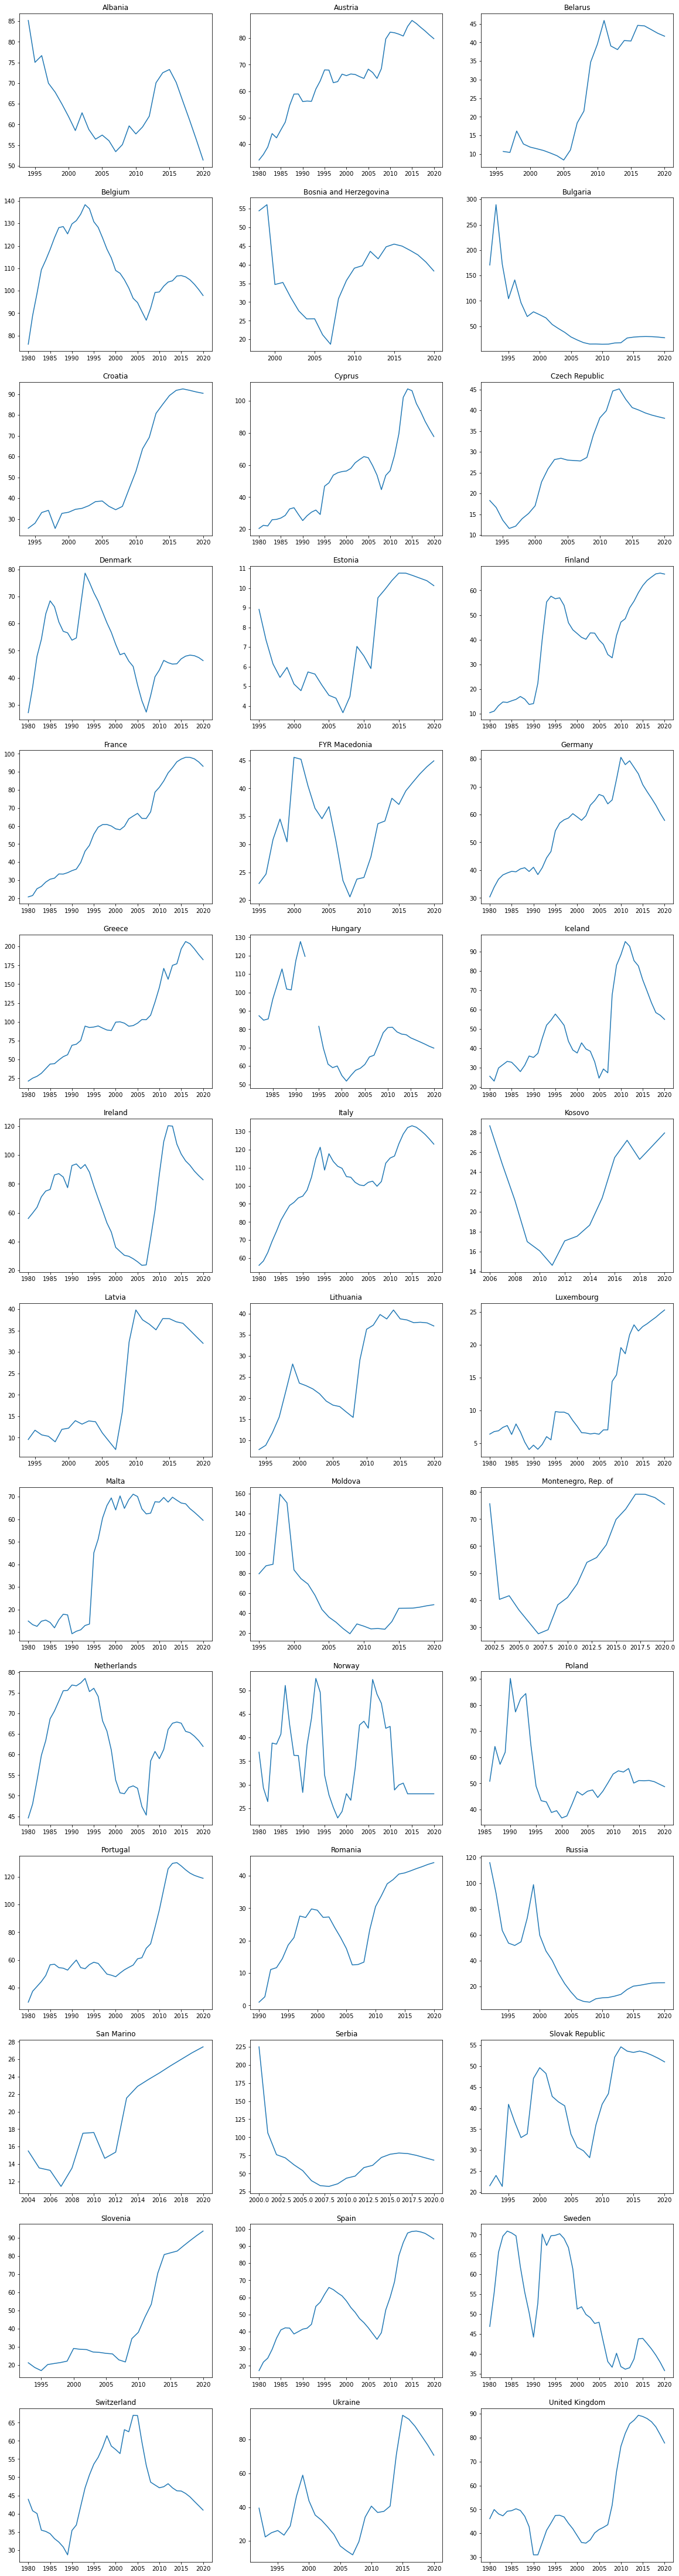

In [80]:
# Plot the Dept to GDP ratio per year per country in EUROPE

print("Dept to GDP ratio per country in EUROPE:")

a = 14 #number of rows 
b = 3 #num of columns
c = 1 #init counter

continent = "Europe"

fig = plt.figure(figsize=(20,80))

for country in Europe_countries:
    
    plt.subplot(a, b, c)
    x = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["year"]
    y = Ratio_df2[Ratio_df2["Continent"]==continent].loc[country]["Value"]
    plt.plot(x,y)
    plt.title(country)
    c = c+1

plt.show()

In [70]:
# Create Europe_df from df2

Europe_df = pd.DataFrame(df2[df2["Continent"]=="Europe"])
Europe_df.drop(columns=["Continent"], inplace=True)
Europe_df.head(3)

KeyError: 'Continent'

In [85]:
len(Europe_countries)

42

In [88]:
Europe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5166 entries, 0 to 22850
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    5166 non-null   object 
 1   Indicator Name  5166 non-null   object 
 2   year            5166 non-null   int32  
 3   Value           4217 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 181.6+ KB


In [89]:
Europe_df.describe()

year         Value
count  5166.000000  4.217000e+03
mean   2000.000000  4.733741e+12
std      11.833305  6.229215e+13
min    1980.000000  1.026660e+00
25%    1990.000000  6.870000e+01
50%    2000.000000  2.114680e+10
75%    2010.000000  4.020000e+11
max    2020.000000  1.911714e+15

In [95]:
Ratio_Europe_df = Europe_df[Europe_df["Indicator Name"] == "Debt to GDP Ratio" ]
Ratio_Europe_df.head(3)

Country Name     Indicator Name  year      Value
1       Albania  Debt to GDP Ratio  1980        NaN
25      Austria  Debt to GDP Ratio  1980  33.974659
44      Belarus  Debt to GDP Ratio  1980        NaN

In [94]:
R = pd.DataFrame(df2[df2["Indicator Name"]=="Debt to GDP Ratio"][["Country Name","year", "Value"]])

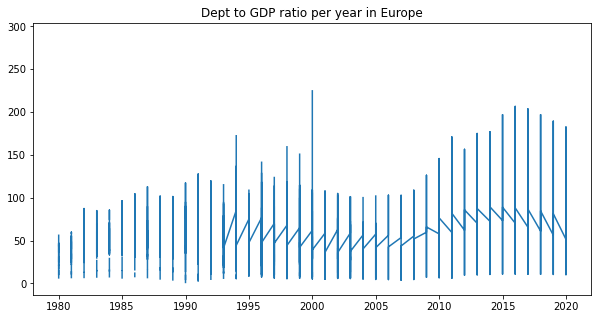

In [98]:
# Plot the Dept to GDP ratio per year in Europe - istiot grafik od gore

fig = plt.figure(figsize=(10,5))

x = Ratio_Europe_df["year"]
y = Ratio_Europe_df["Value"]
plt.plot(x,y)
plt.title(f"Dept to GDP ratio per year in Europe")
c = c+1

plt.show()

<Figure size 2880x5760 with 0 Axes>

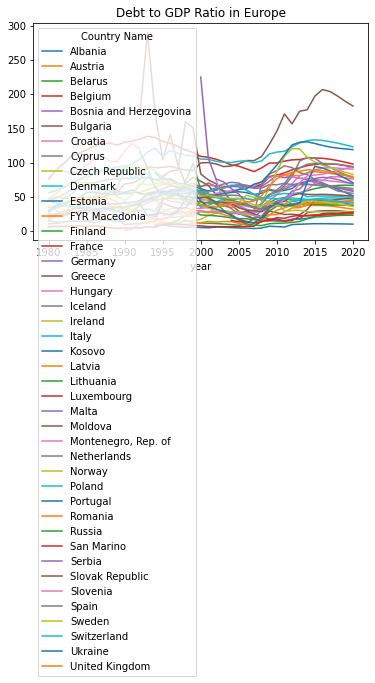

In [96]:
# Plot the Dept to GDP ratio per country in Europe

fig = plt.figure(figsize=(40,80))

urbpop=Ratio_Europe_df[['Country Name','year','Value']] 
urbpopwide=urbpop.pivot(index='year',columns='Country Name',values='Value')
urbpopwide.plot.line(title='Debt to GDP Ratio in Europe')
plt.legend(loc=(1.04,0))
plt.show()


<AxesSubplot:xlabel='year'>

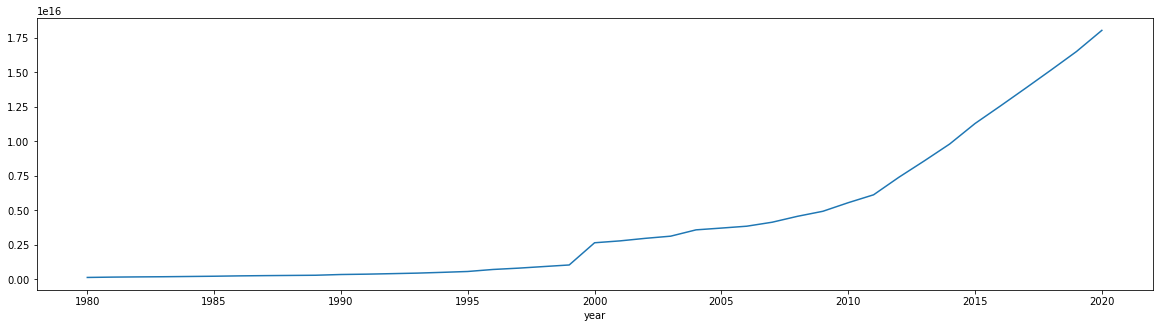

In [99]:
Agg_Debt = df2[df2["Indicator Name"]=="Gross Government Debt"].groupby(["year"])['Value'].sum()
Agg_Debt.plot(figsize=[20,5])

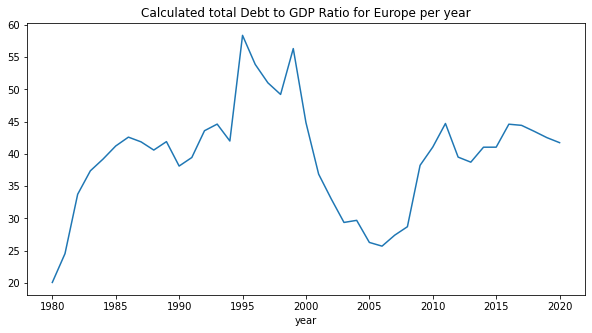

In [114]:
# Plot the calculated Debt to GDP ratio for Europe in total - ??? DALI DA SE NAPRAVI I ZA DR KONTINENTI???

Europe_debt = Europe_df[Europe_df["Indicator Name"]=="Gross Government Debt"].groupby(["year"])["Value"].sum()
Europe_GDP = Europe_df[Europe_df["Indicator Name"]=="Gross Domestic Product"].groupby(["year"])["Value"].sum()
Europe_Ratio = (Europe_debt / Europe_GDP)*100


fig = plt.figure(figsize=(10,5))
Europe_Ratio.plot()
plt.title("Calculated total Debt to GDP Ratio for Europe per year")
plt.show()

### BALKAN

In [122]:
Balkan_countries = ["Albania", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Kosovo", "Montenegro, Rep. of", "FYR Macedonia ", 
                   "Romania","Serbia", "Slovenia", "Greece"]

In [150]:
# def feature_Balkan_Country(country):
    
#     if Europe_df["Country Name"].isin(Balkan_countries):
#         Balkan_Country ="Y"
#     else: 
#         Balkan_Country ="N"
        
#     return Balkan_Country
        

# Europe_df = Europe_df.apply(feature_Balkan_Country, axis=1)

# Europe_df

In [151]:
# Europe_df["Balkan_Country"] = "N"

# for country in Europe_df["Country Name"]:
#     if Europe_df["Country Name"].isin(Balkan_countries).all():
#         Europe_df = Europe_df.replace("N", "Y")
        
# Europe_df

In [159]:
# Create Balkan dataset

Balkan_df = Europe_df[Europe_df["Country Name"].isin(Balkan_countries)]
# display(Balkan_df.head(3))

Not_Balkan_df = Europe_df[Europe_df["Country Name"].isin(Balkan_countries)==False]
# display(Not_Balkan_df.head(3))

<Figure size 2880x5760 with 0 Axes>

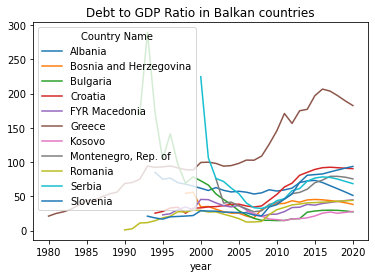

In [160]:
# Plot the Dept to GDP ratio per country in Balkan countries 

Ratio_Balkan = Ratio_Europe_df[Ratio_Europe_df["Country Name"].isin(Balkan_countries)]

fig = plt.figure(figsize=(40,80))

urbpop=Ratio_Balkan[['Country Name','year','Value']] 
urbpopwide=urbpop.pivot(index='year',columns='Country Name',values='Value')
urbpopwide.plot.line(title='Debt to GDP Ratio in Balkan countries')

plt.show()

<Figure size 2880x5760 with 0 Axes>

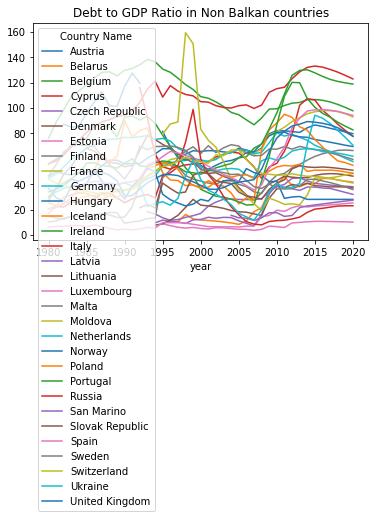

In [162]:
# Plot the Dept to GDP ratio per country in Balkan countries 

Ratio_Not_Balkan = Ratio_Europe_df[Ratio_Europe_df["Country Name"].isin(Balkan_countries)==False]

fig = plt.figure(figsize=(40,80))

urbpop=Ratio_Not_Balkan[['Country Name','year','Value']] 
urbpopwide=urbpop.pivot(index='year',columns='Country Name',values='Value')
urbpopwide.plot.line(title='Debt to GDP Ratio in Non Balkan countries')

plt.show()

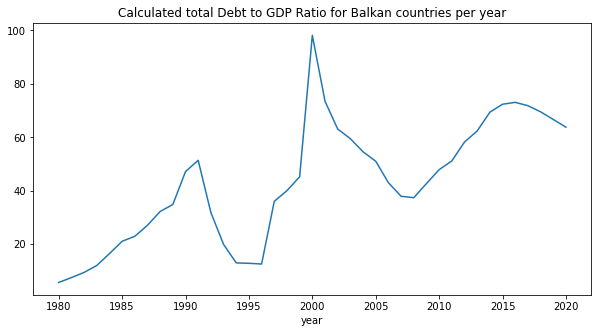

In [161]:
# Plot the calculated Debt to GDP ratio for Balkan countries in total

Balkan_debt = Balkan_df[Balkan_df["Indicator Name"]=="Gross Government Debt"].groupby(["year"])["Value"].sum()
Balkan_GDP = Balkan_df[Balkan_df["Indicator Name"]=="Gross Domestic Product"].groupby(["year"])["Value"].sum()
Balkan_Ratio = (Balkan_debt / Balkan_GDP)*100


fig = plt.figure(figsize=(10,5))
Balkan_Ratio.plot()
plt.title("Calculated total Debt to GDP Ratio for Balkan countries per year")
plt.show()

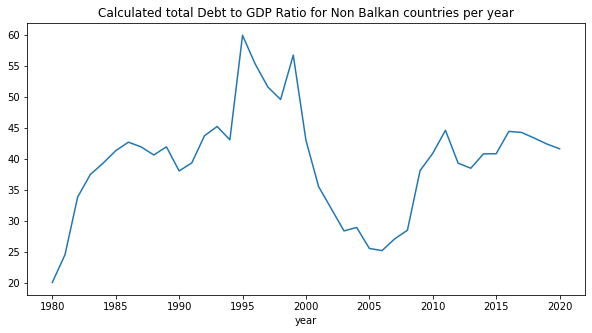

In [163]:
# Plot the calculated Debt to GDP ratio for Non Balkan countries in total

Not_Balkan_debt = Not_Balkan_df[Not_Balkan_df["Indicator Name"]=="Gross Government Debt"].groupby(["year"])["Value"].sum()
Not_Balkan_GDP = Not_Balkan_df[Not_Balkan_df["Indicator Name"]=="Gross Domestic Product"].groupby(["year"])["Value"].sum()
Not_Balkan_Ratio = (Not_Balkan_debt / Not_Balkan_GDP)*100


fig = plt.figure(figsize=(10,5))
Not_Balkan_Ratio.plot()
plt.title("Calculated total Debt to GDP Ratio for Non Balkan countries per year")
plt.show()

In [ ]:
# Istiot kod moze da se iskoristi za EU i not EU i sl

### MACEDONIA

In [165]:
Macedonia_Neighbours = ["Bulgaria", "Greece", "Serbia", "Kosovo", "Albania"]

In [167]:
# Create Macedonia and Macedonia_neighbours datasets

Macedonia_df = Europe_df[Europe_df["Country Name"]=="FYR Macedonia "]
# display(Macedonia_df.head(3))

Macedonia_Neighbours_df = Europe_df[Europe_df["Country Name"].isin(Macedonia_Neighbours)]
# display(Macedonia_Neighbours_df.head(3))

In [172]:
Ratio_Macedonia_Neighbours = Ratio_Europe_df[Ratio_Europe_df["Country Name"].isin(Macedonia_Neighbours)]
Ratio_Macedonia_Neighbours

Country Name     Indicator Name  year       Value
1          Albania  Debt to GDP Ratio  1980         NaN
73        Bulgaria  Debt to GDP Ratio  1980         NaN
193         Greece  Debt to GDP Ratio  1980   21.166179
268         Kosovo  Debt to GDP Ratio  1980         NaN
427         Serbia  Debt to GDP Ratio  1980         NaN
...            ...                ...   ...         ...
22321      Albania  Debt to GDP Ratio  2020   51.410504
22393     Bulgaria  Debt to GDP Ratio  2020   27.401880
22513       Greece  Debt to GDP Ratio  2020  182.512720
22588       Kosovo  Debt to GDP Ratio  2020   27.951915
22747       Serbia  Debt to GDP Ratio  2020   68.566125

[205 rows x 4 columns]

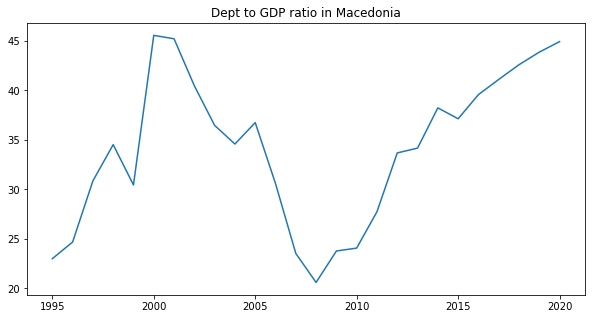

In [176]:
# Plot the Dept to GDP ratio in Macedonia VS Macedonia_Neighbours

Ratio_Macedonia = Ratio_Europe_df[Ratio_Europe_df["Country Name"]=="FYR Macedonia "]
Ratio_Macedonia_Neighbours = Ratio_Europe_df[Ratio_Europe_df["Country Name"].isin(Macedonia_Neighbours)]

fig = plt.figure(figsize=(10,5))

x = Ratio_Macedonia["year"]
y = Ratio_Macedonia["Value"]
plt.plot(x,y)
plt.title('Dept to GDP ratio in Macedonia')

plt.show()

<Figure size 720x360 with 0 Axes>

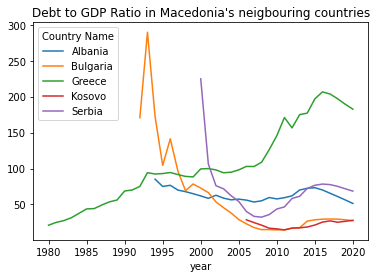

In [178]:
# Plot the Dept to GDP ratio in Macedonia VS Macedonia_Neighbours

fig = plt.figure(figsize=(10,5))

urbpop=Ratio_Macedonia_Neighbours[['Country Name','year','Value']] 
urbpopwide=urbpop.pivot(index='year',columns='Country Name',values='Value')
urbpopwide.plot.line(title="Debt to GDP Ratio in Macedonia's neigbouring countries")

plt.show()